In [1]:
import pandas as pd
from __future__ import print_function
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [3]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))
from UKMovementSensing import hsmm

In [4]:
execfile('workflow/config.py')

In [5]:
# Import data with states
filenames = os.listdir(states_path_model)
filenames = [fn for fn in filenames if os.path.isfile(os.path.join(states_path_model,fn))]
datasets = [pd.read_csv(os.path.join(states_path_model,fn), encoding='utf-8', index_col='timestamp', parse_dates=True) for fn in filenames]

print(len(datasets))

135


In [9]:
from matplotlib.colors import LinearSegmentedColormap
# One more than the number of states, so we have a color for 'All'
nr_states = 4 #all_data.state.nunique()
colormap, cmap = hsmm.get_color_map(nr_states+1)
cmap_states = LinearSegmentedColormap.from_list('name',
                                             [colormap[i] for i in range(nr_states)],
                                             nr_states)

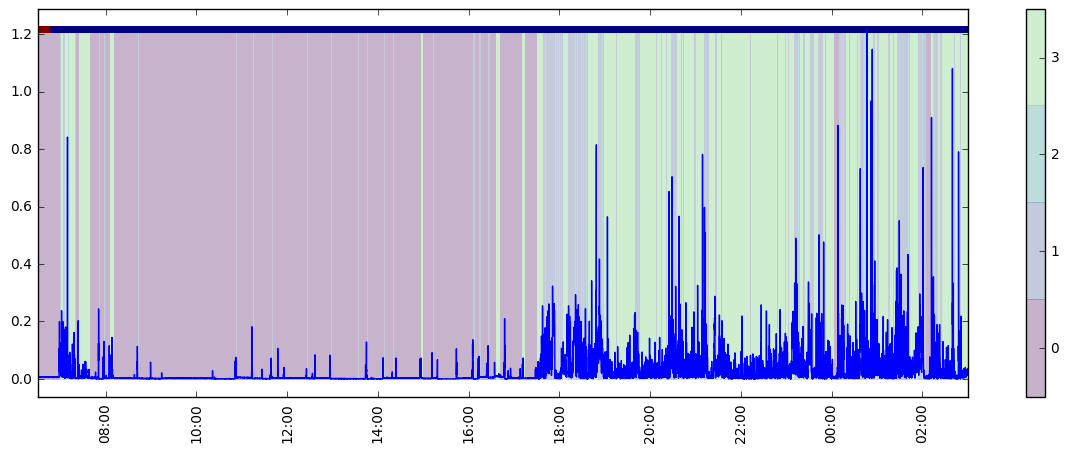

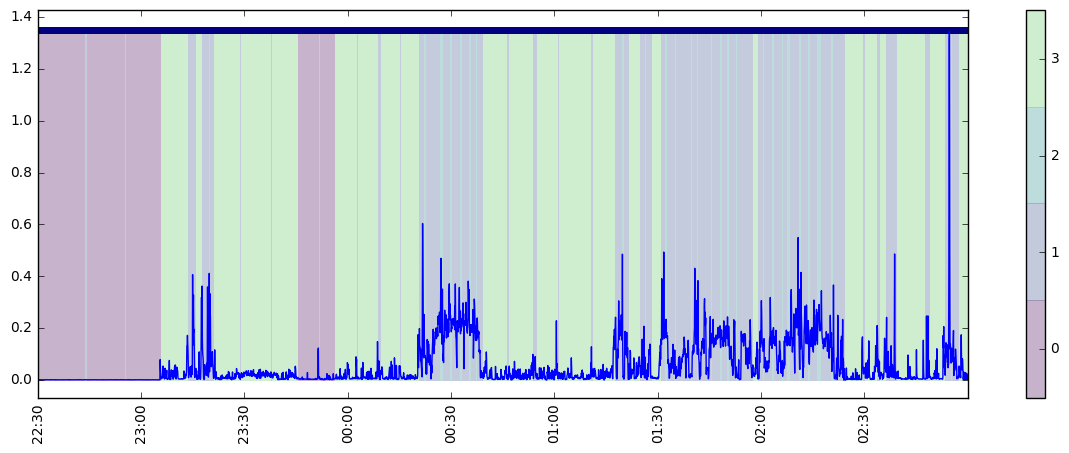

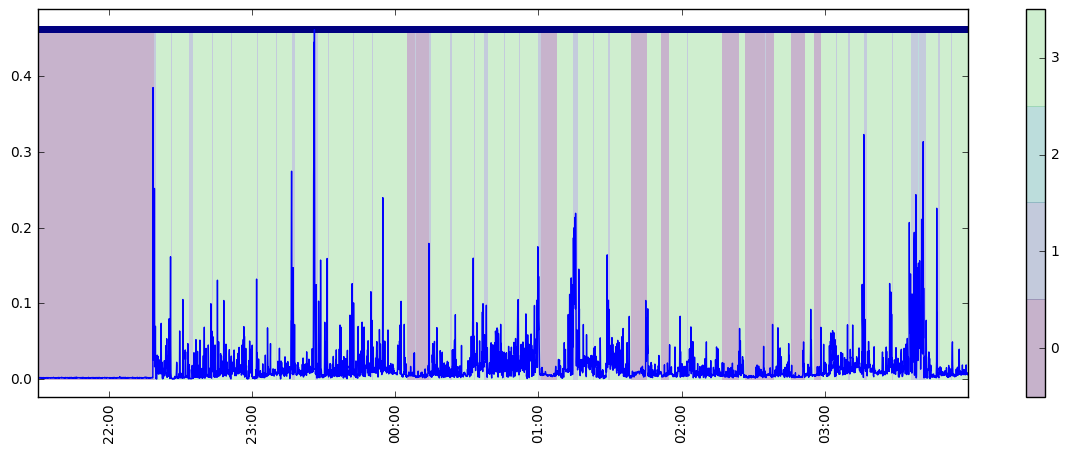

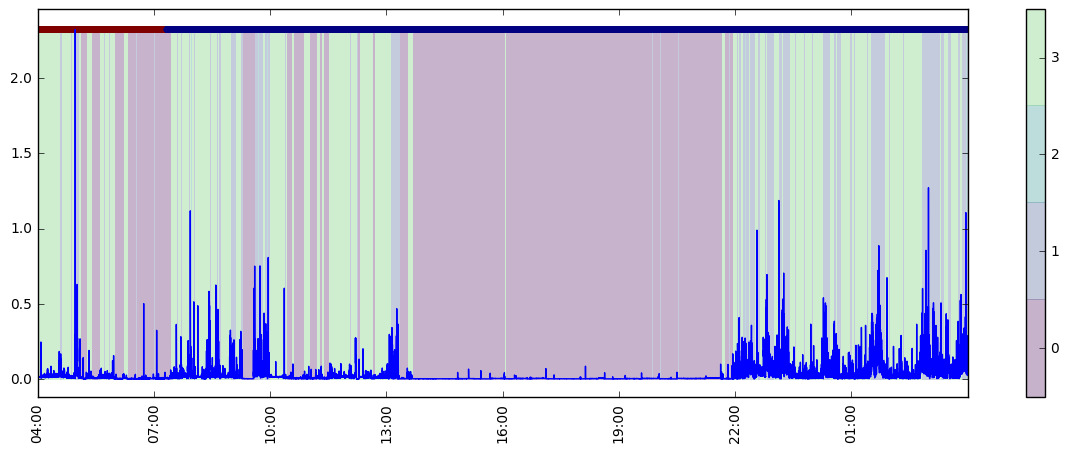

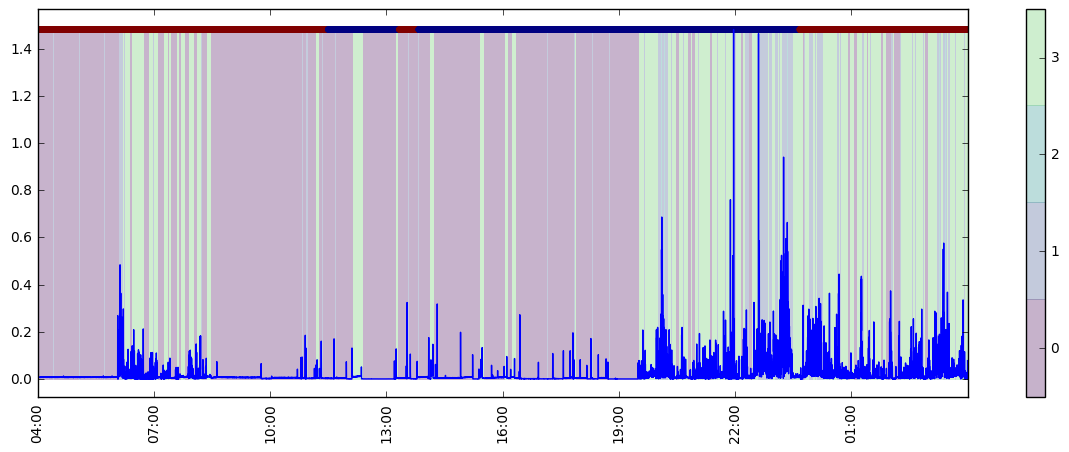

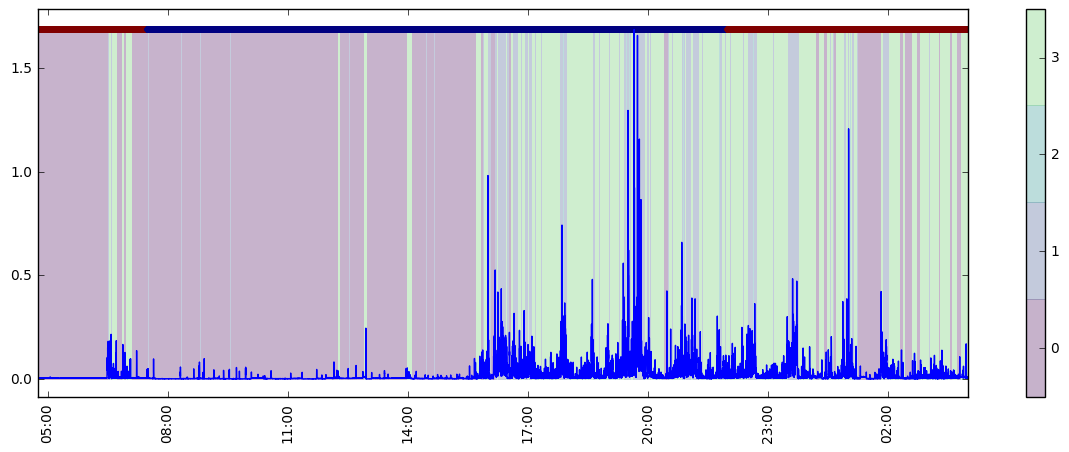

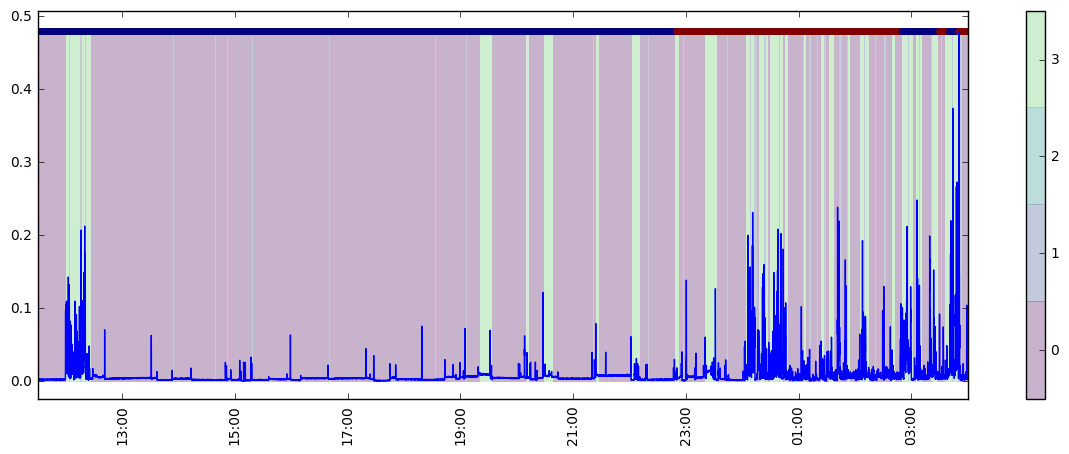

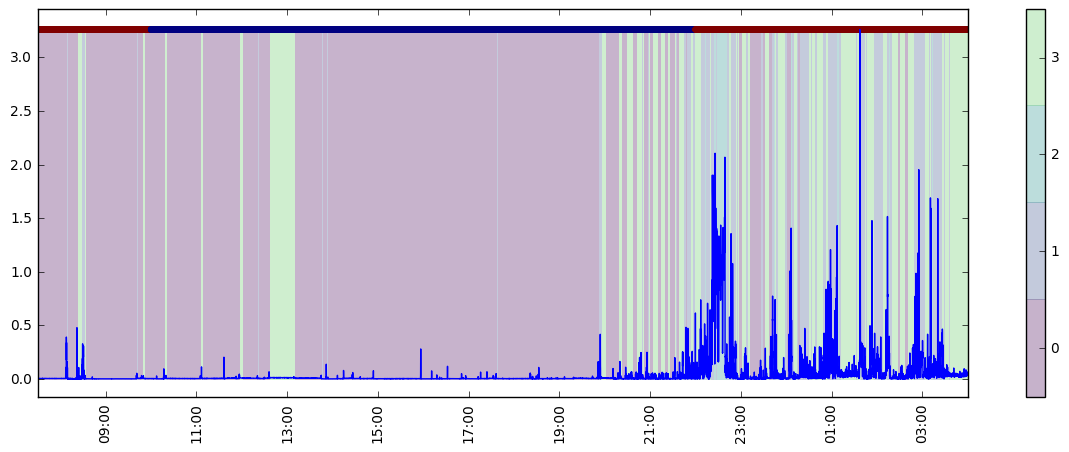

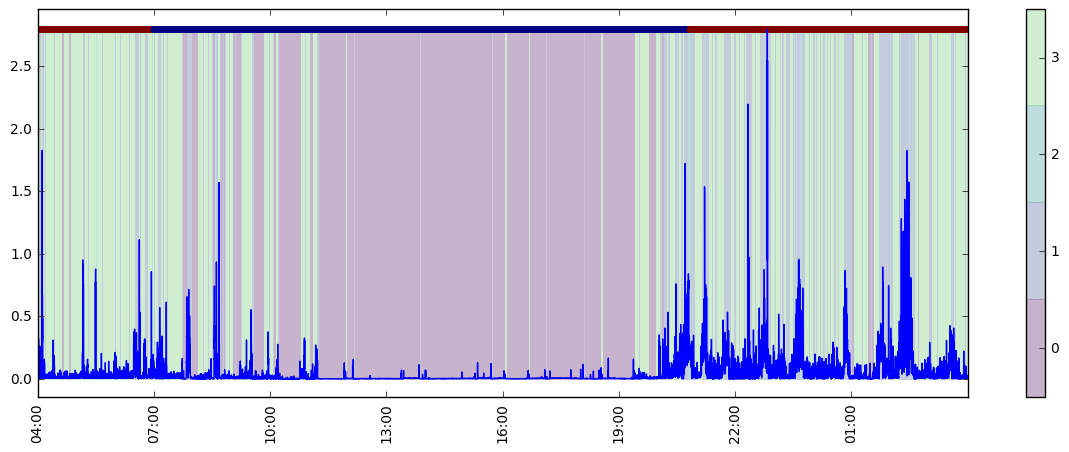

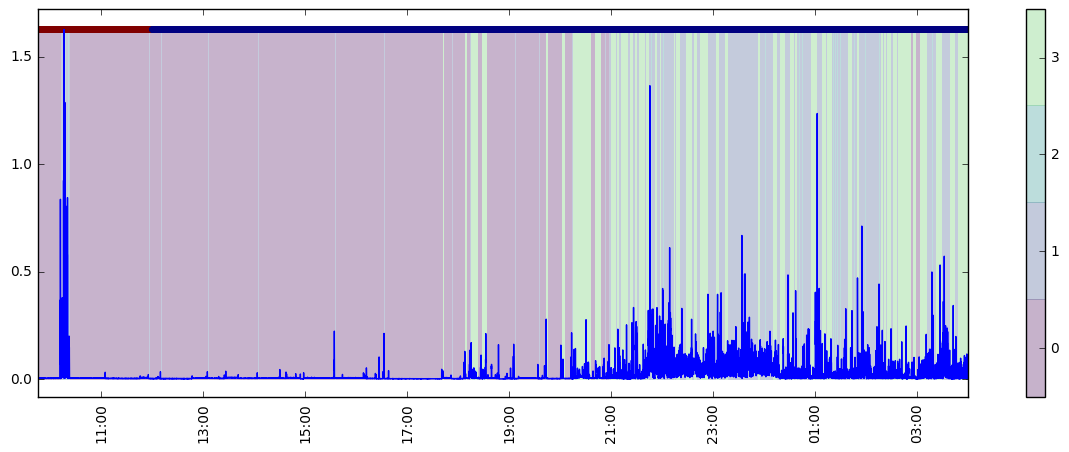

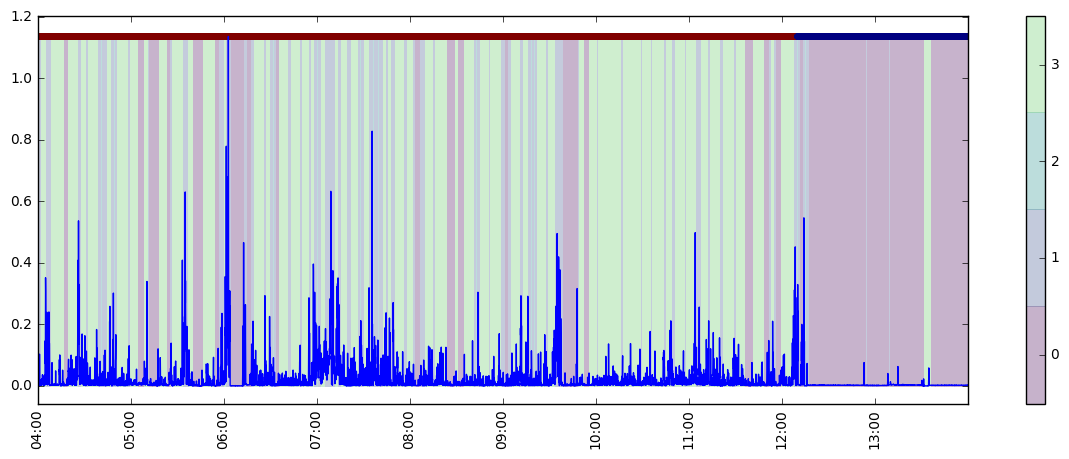

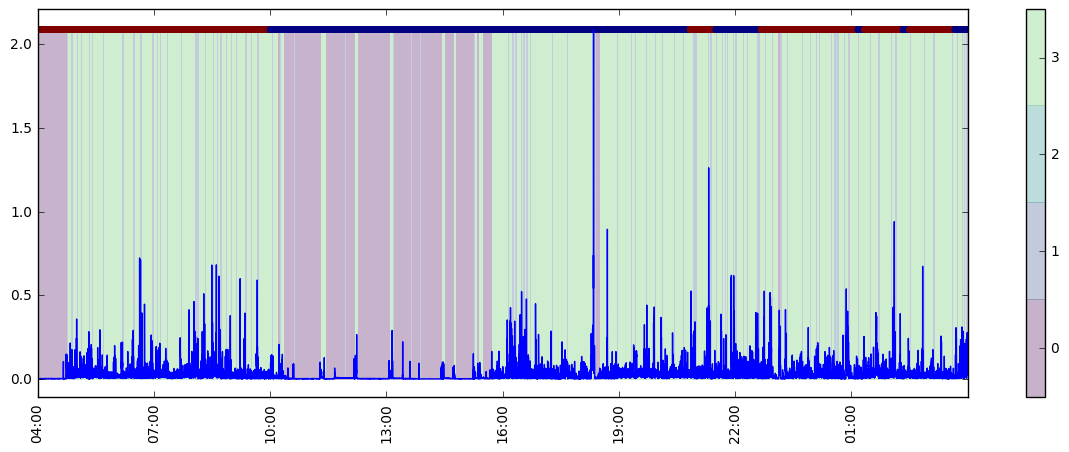

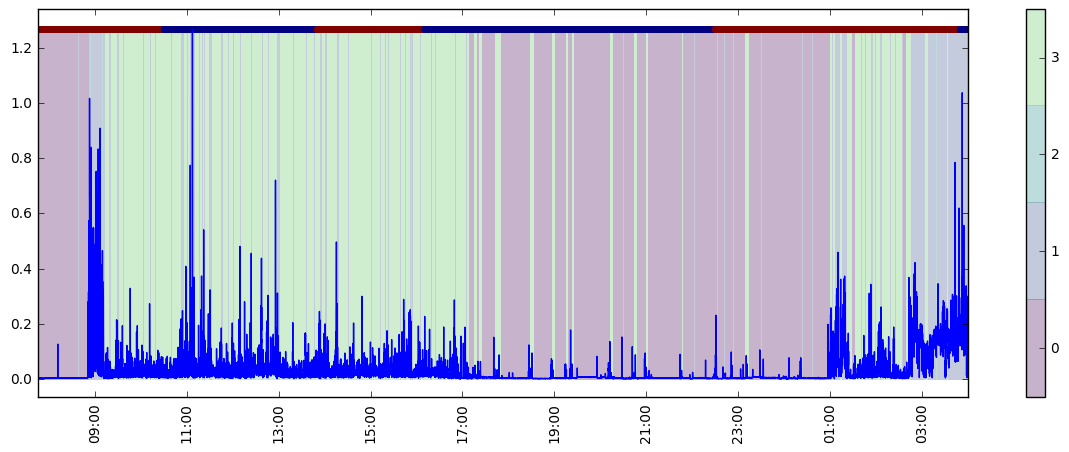

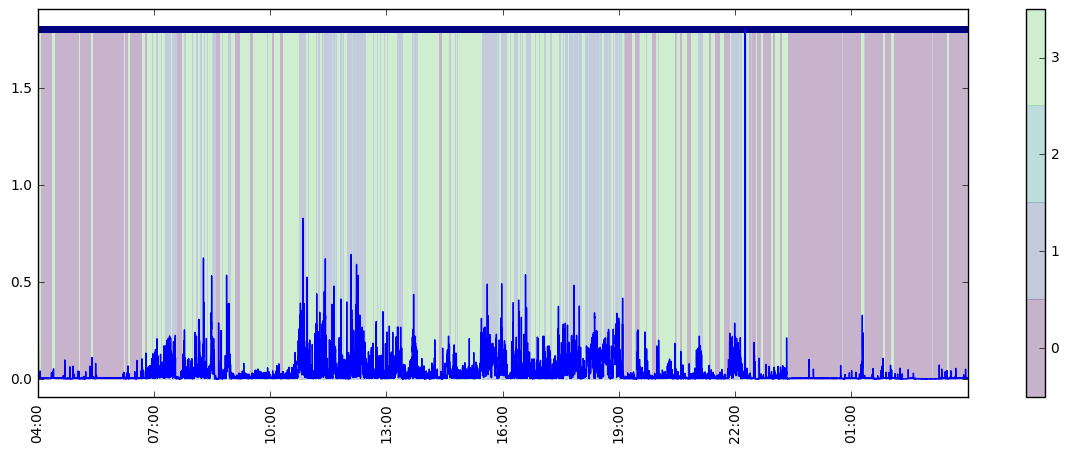

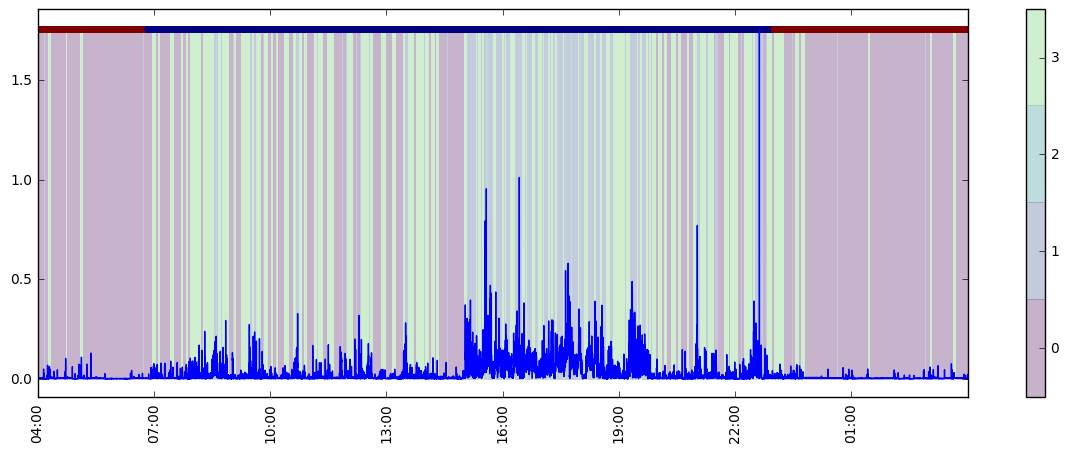

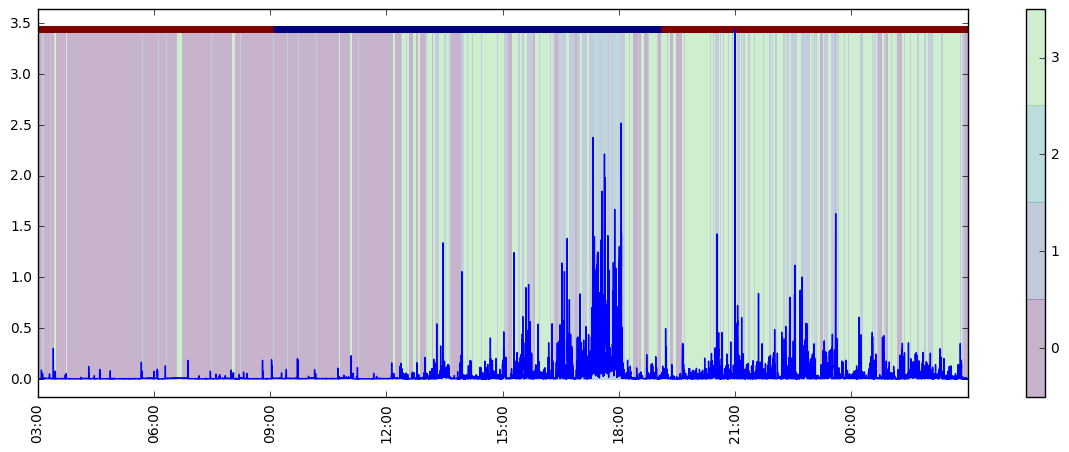

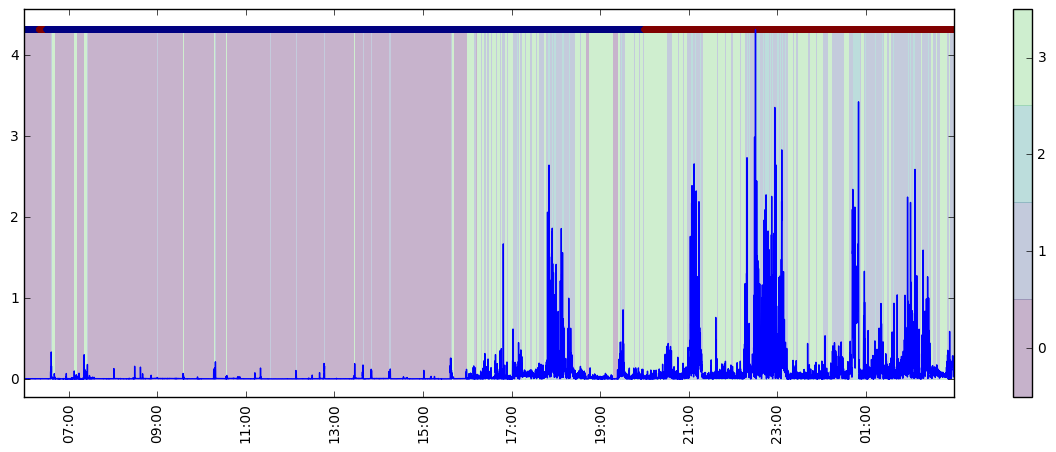

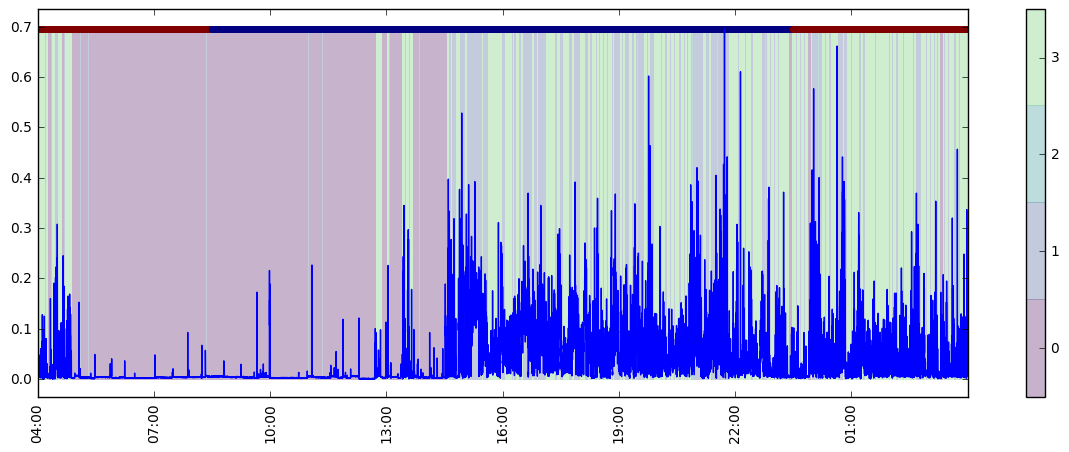

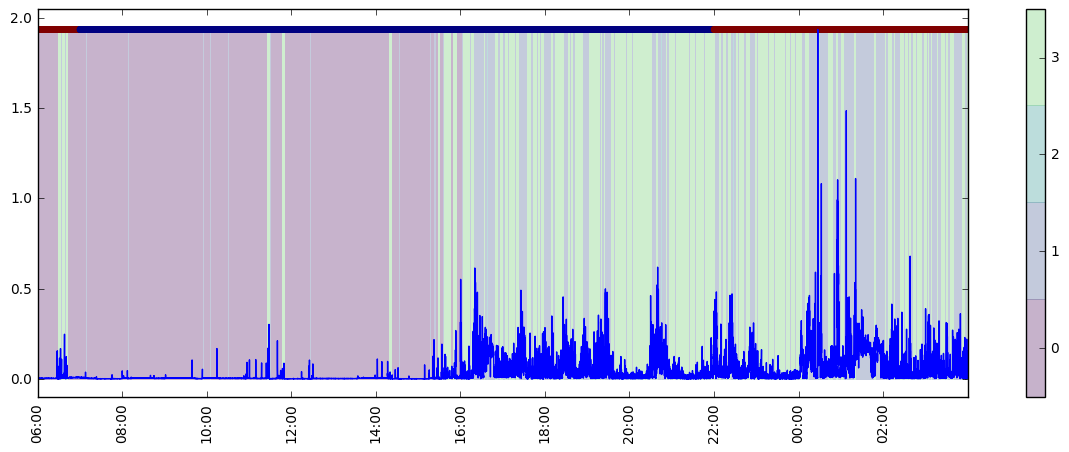

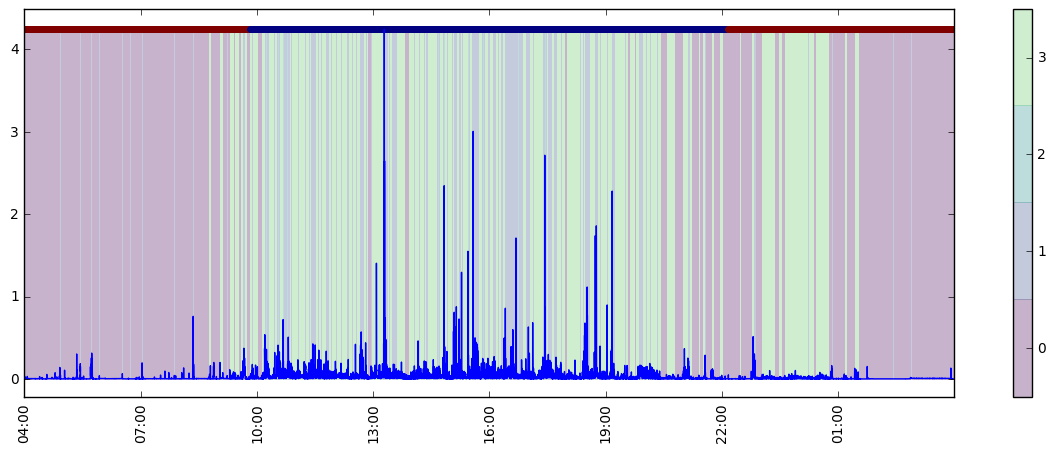

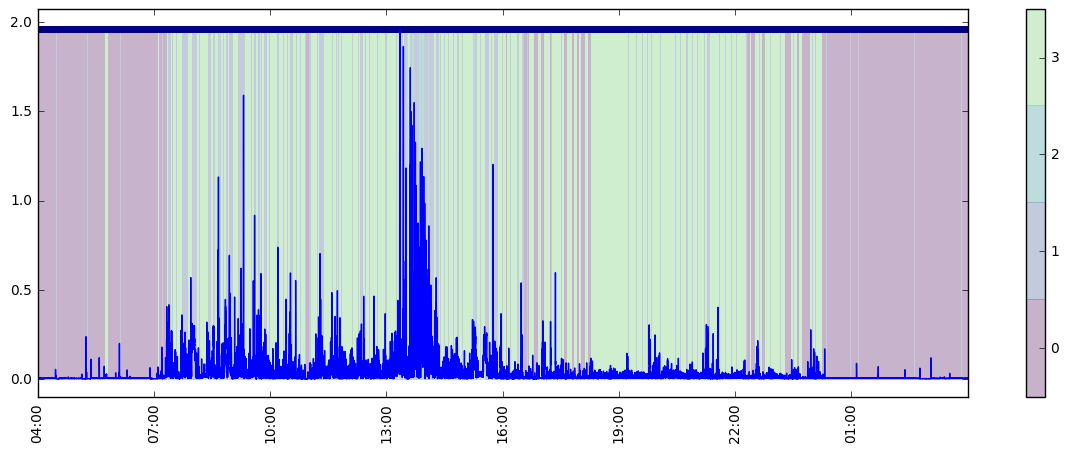

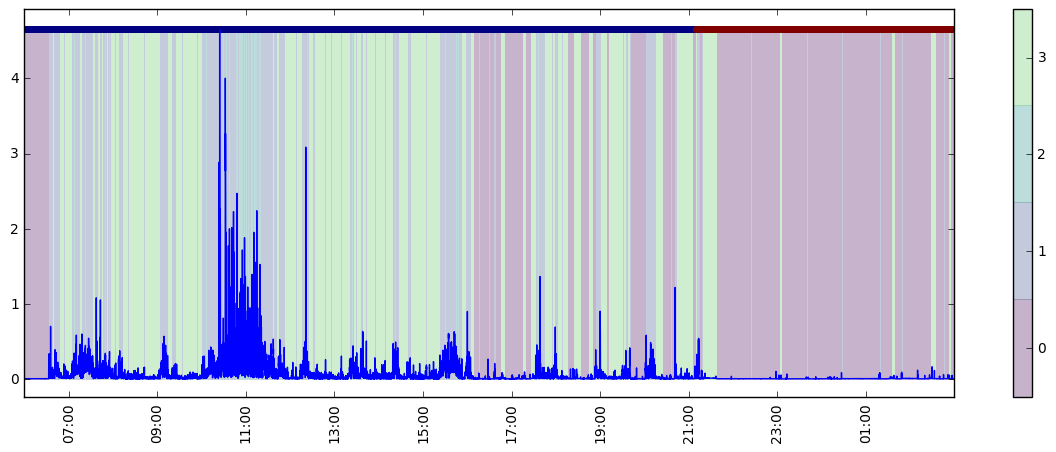

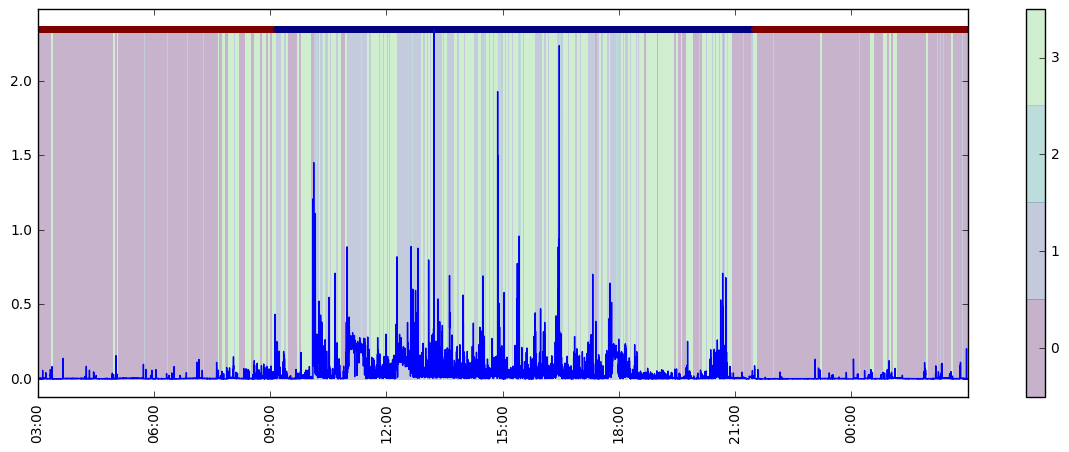

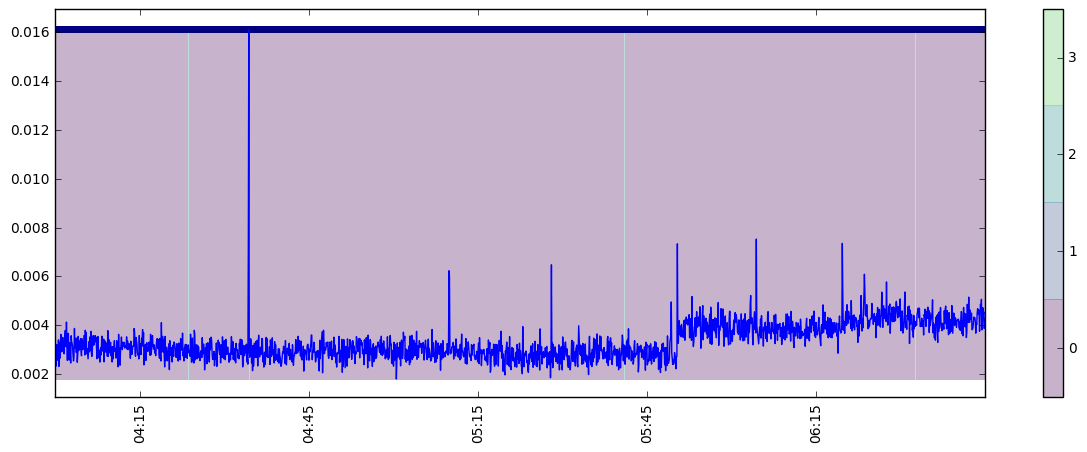

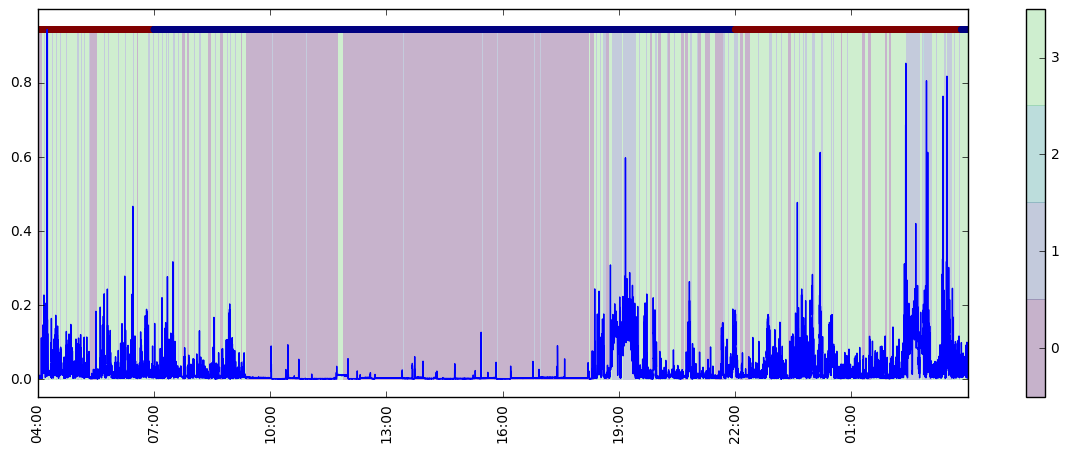

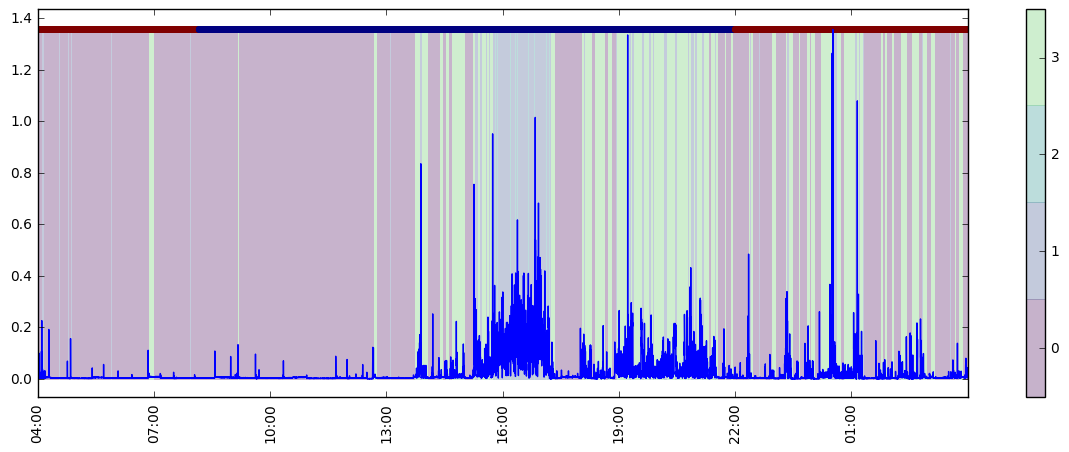

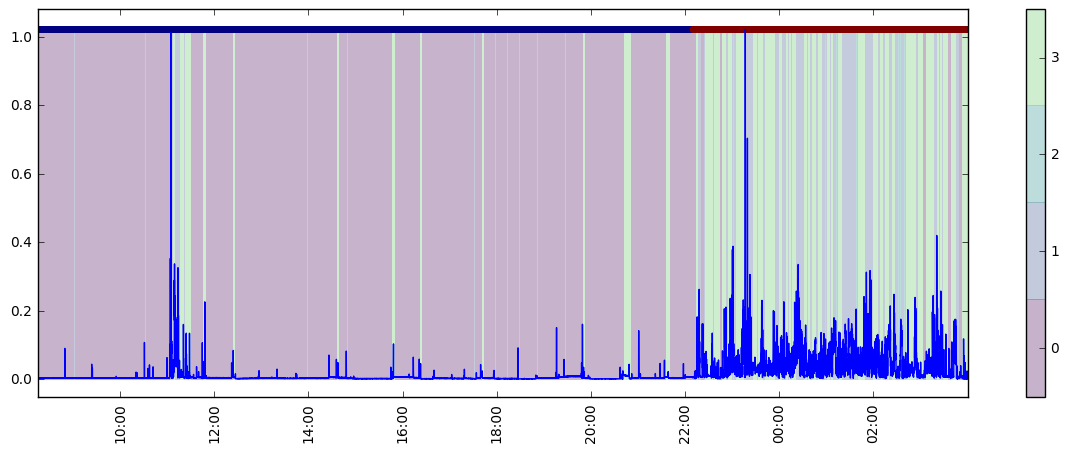

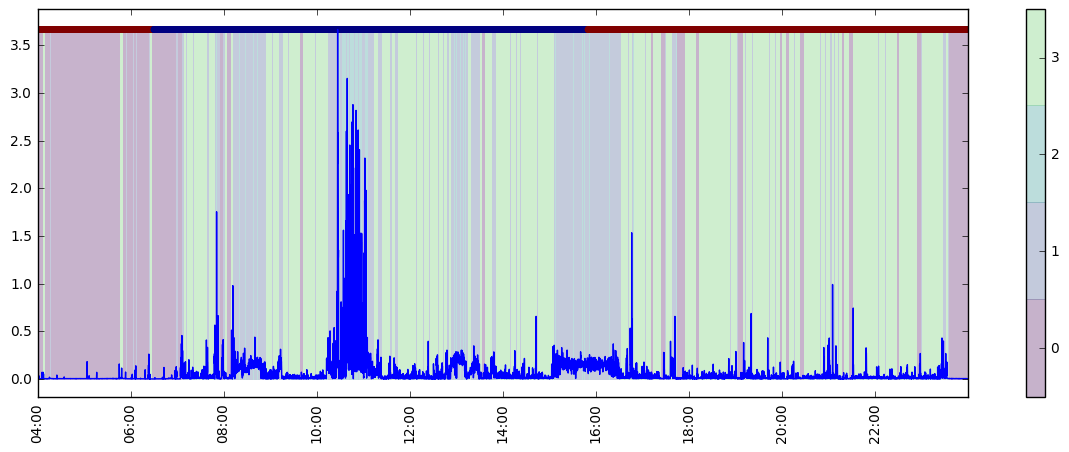

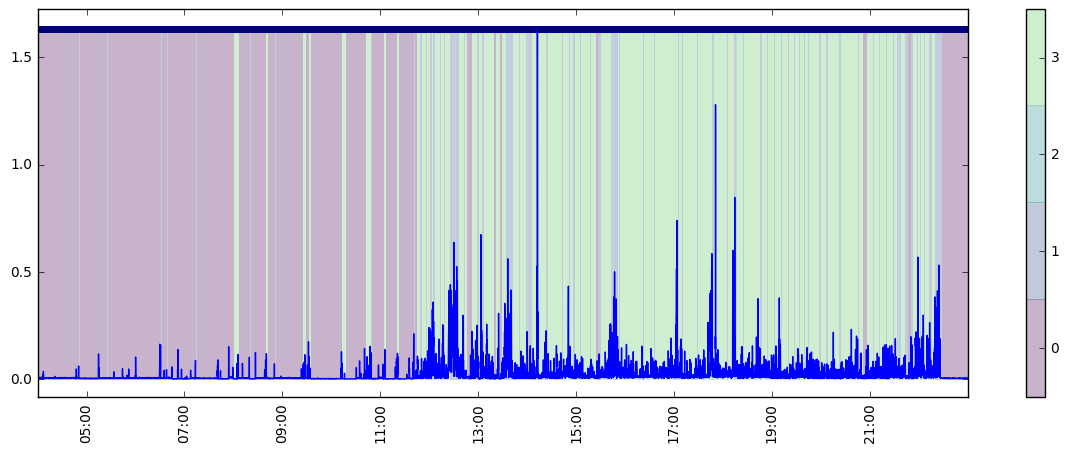

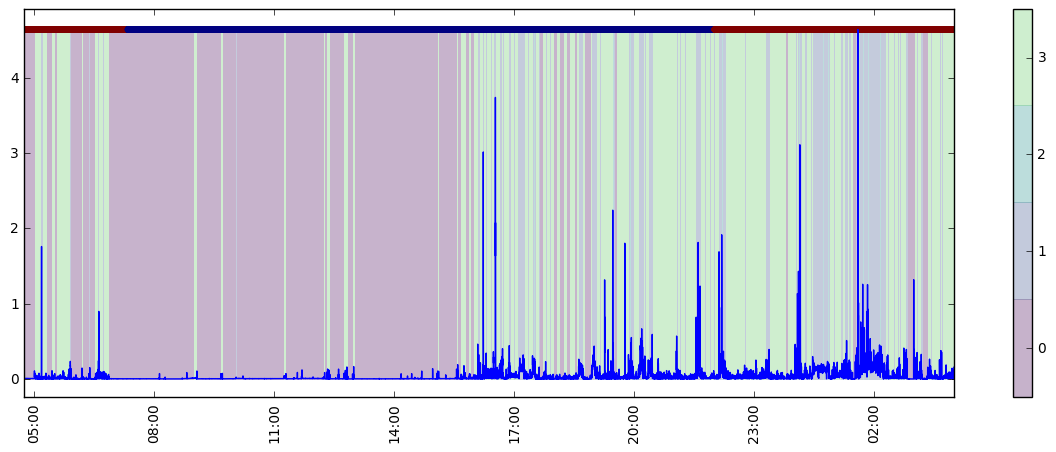

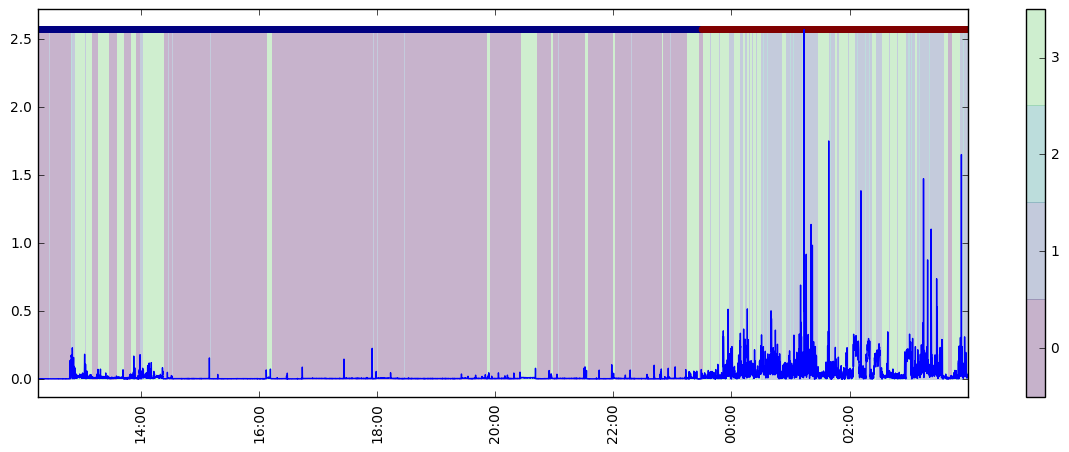

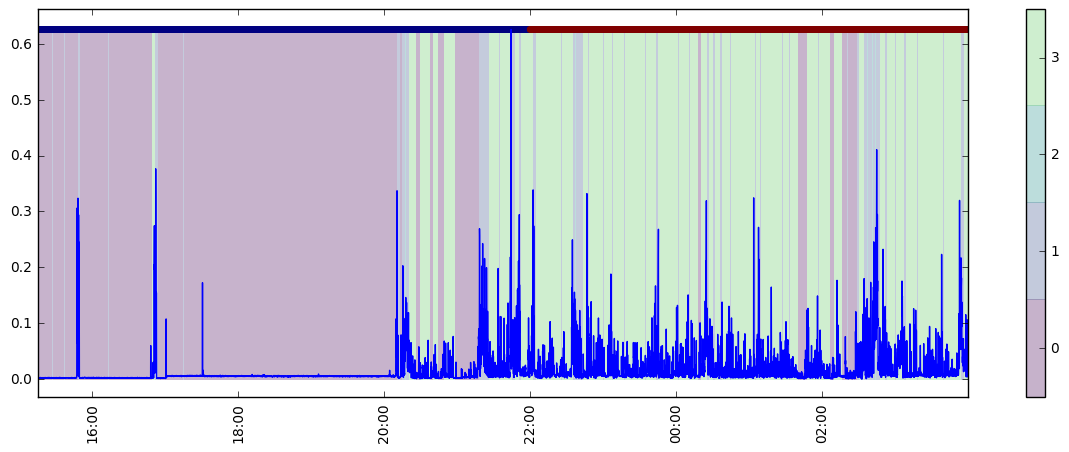

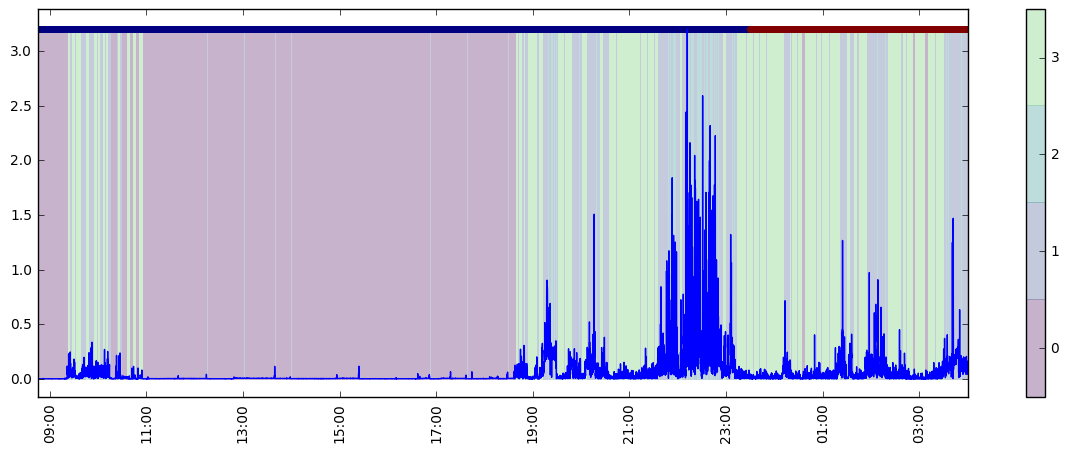

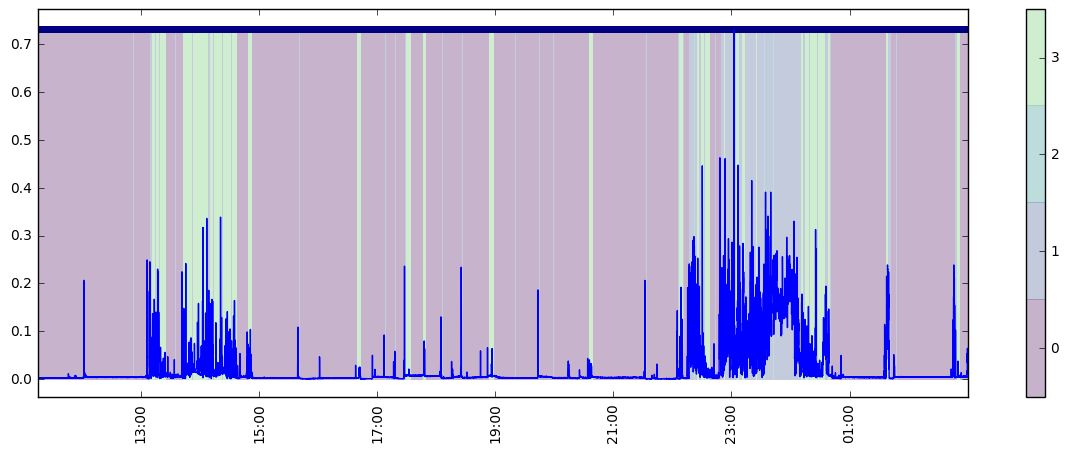

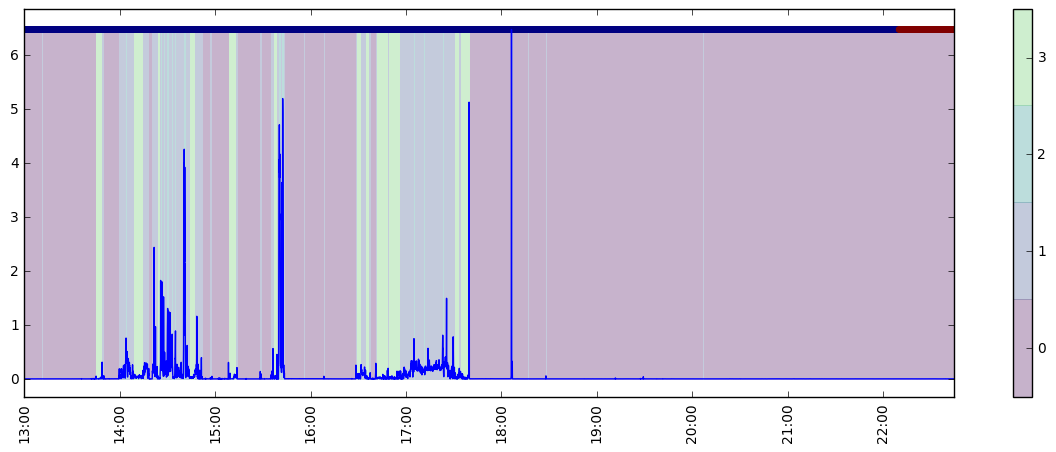

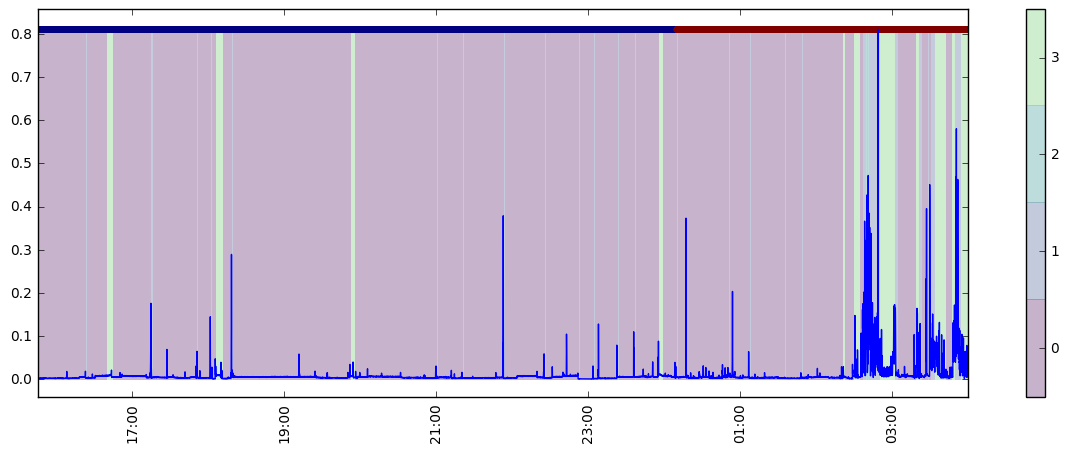

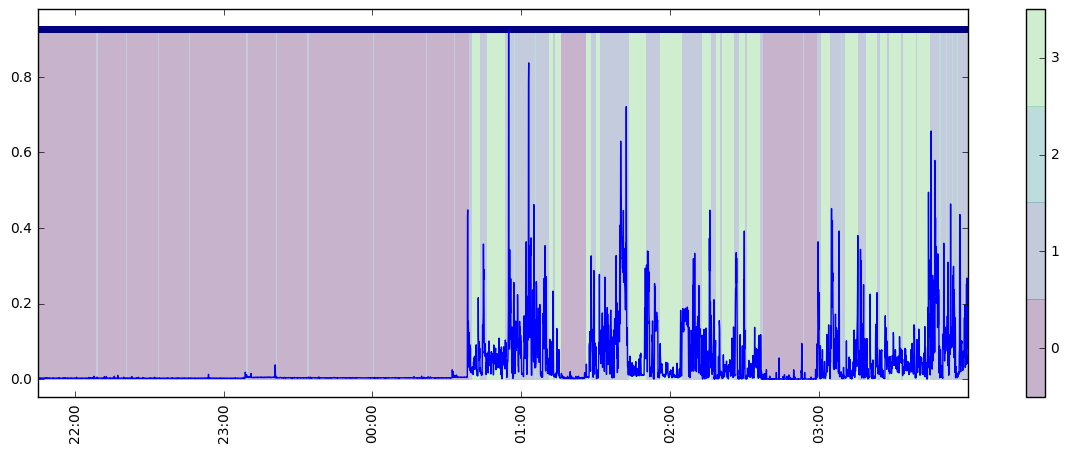

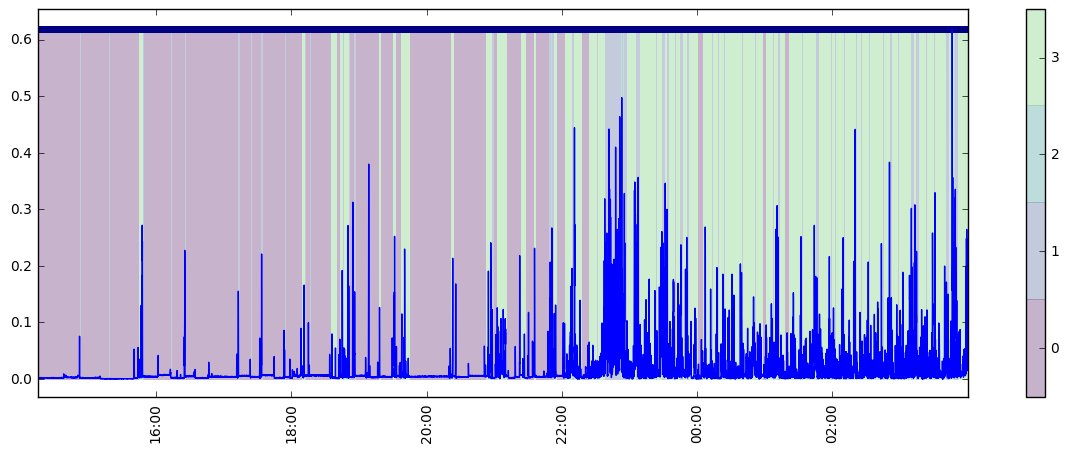

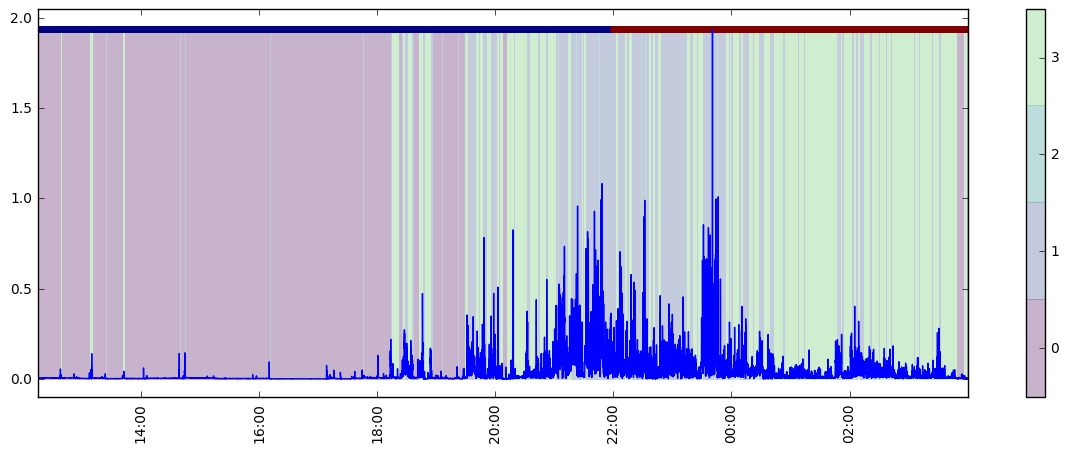

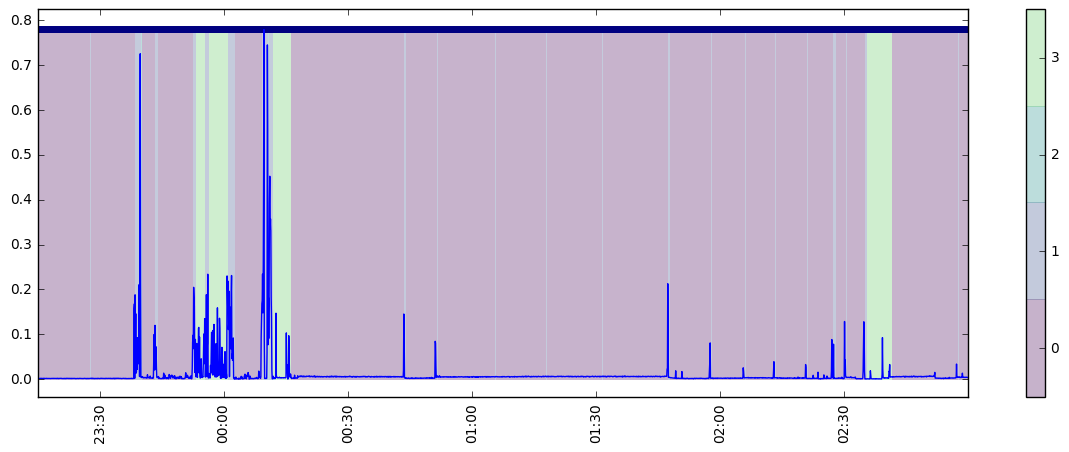

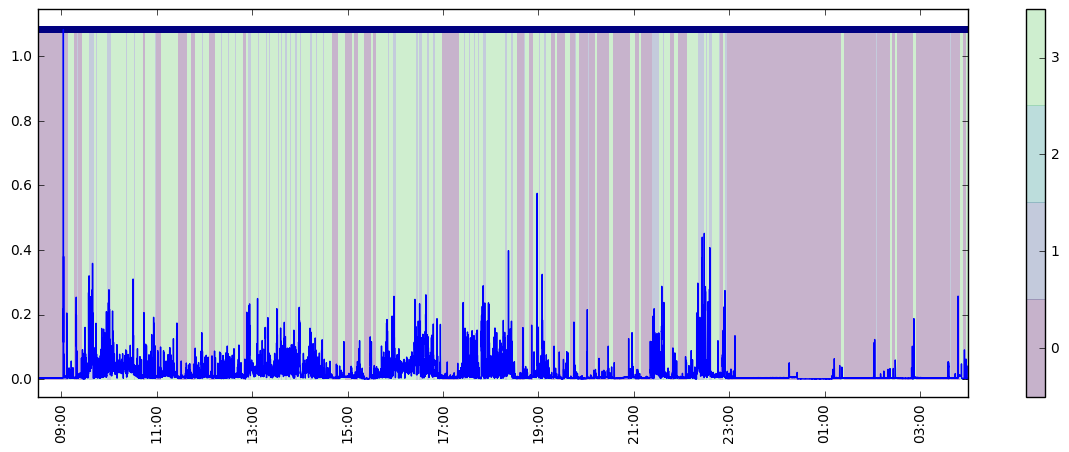

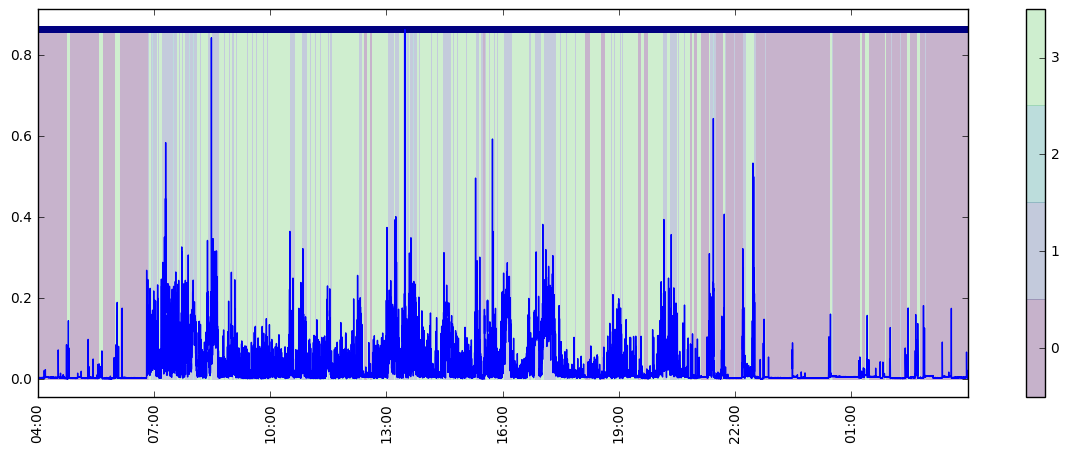

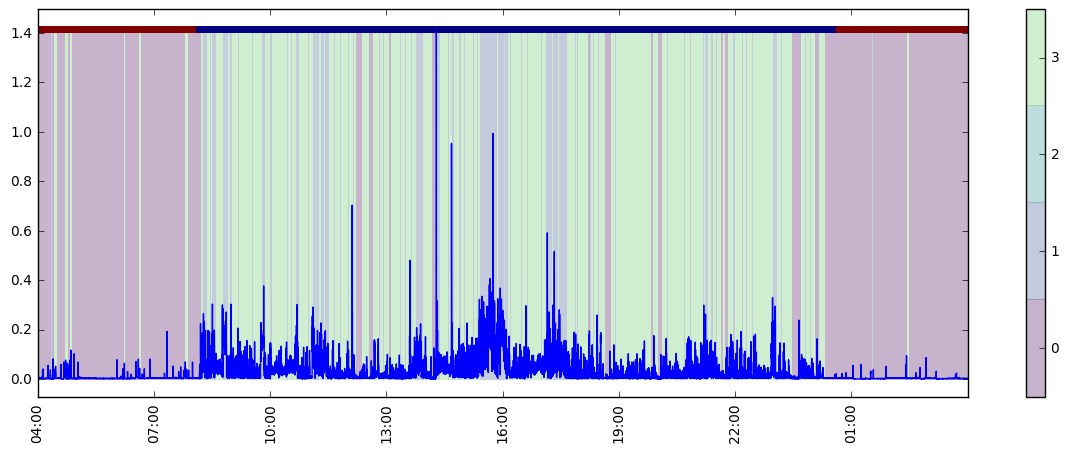

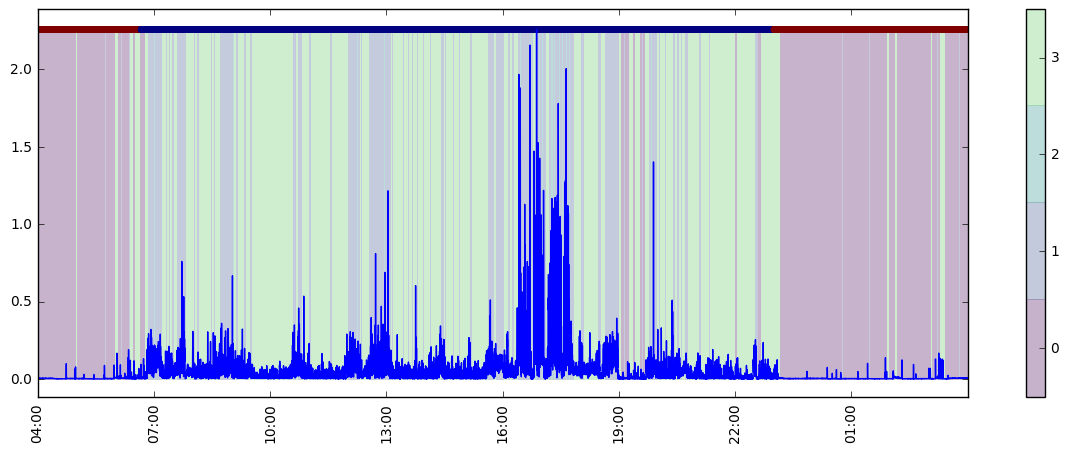

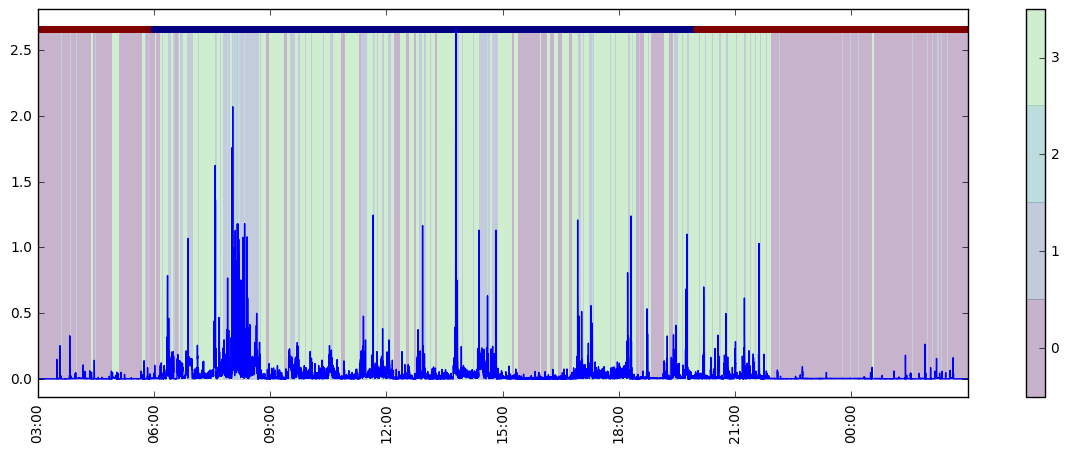

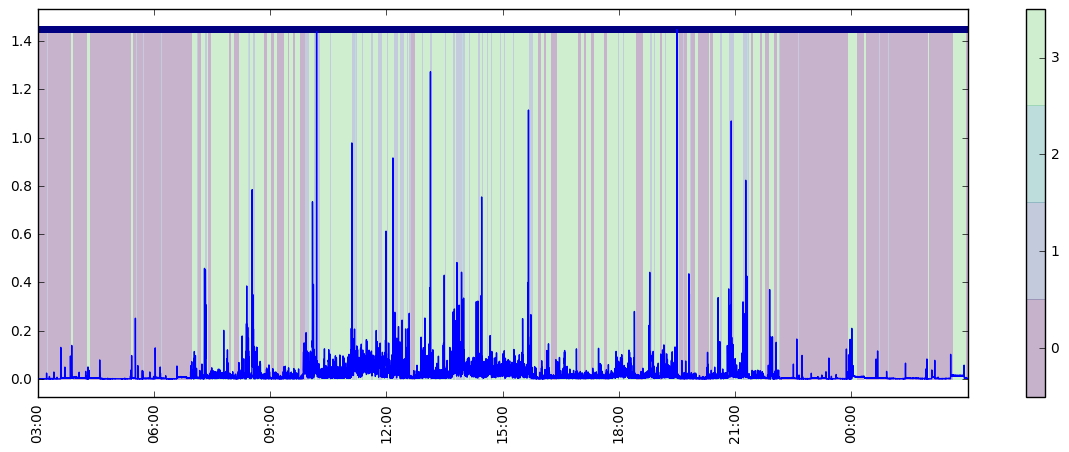

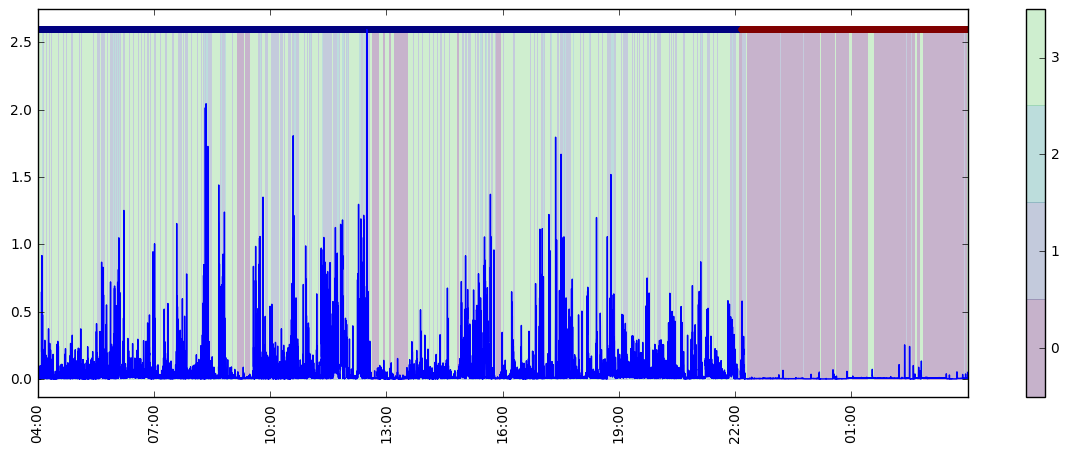

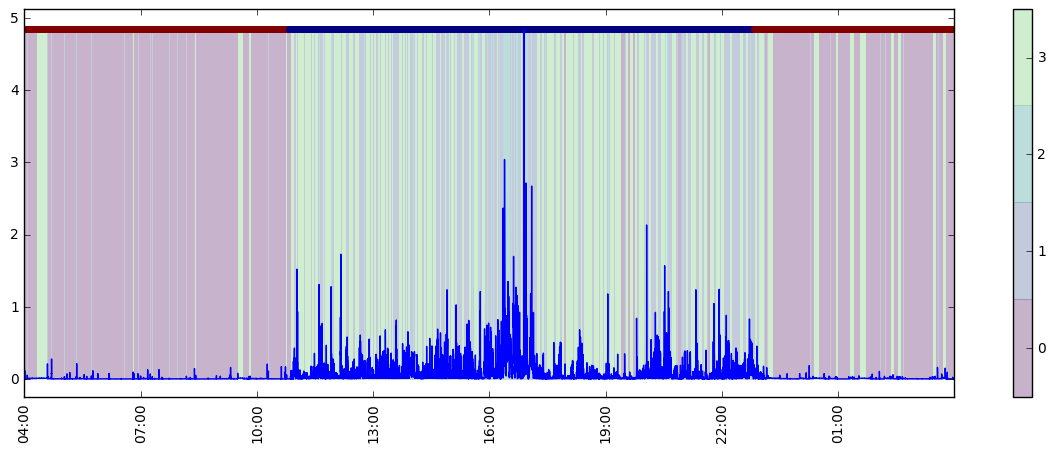

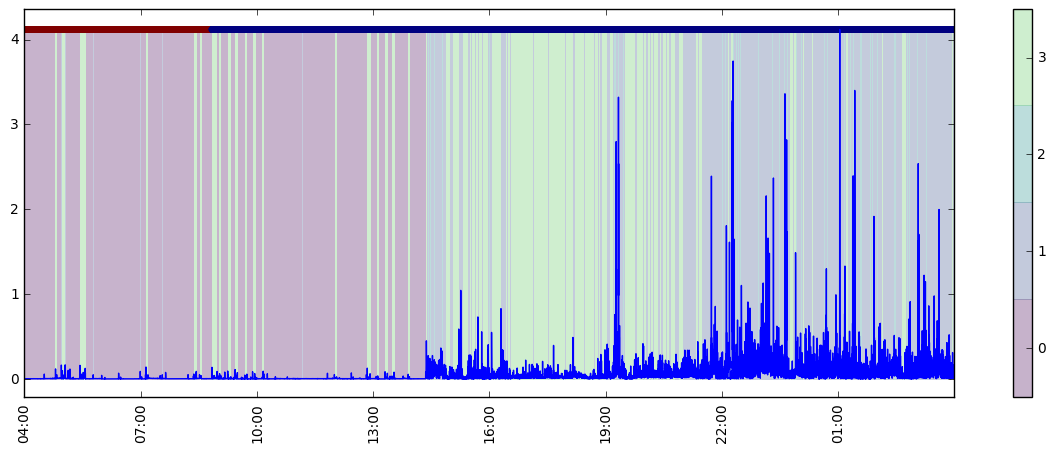

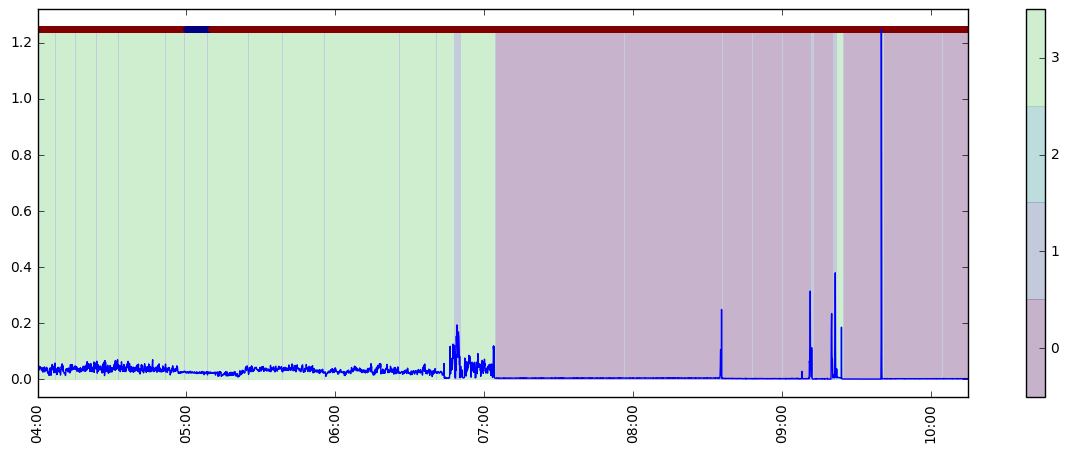

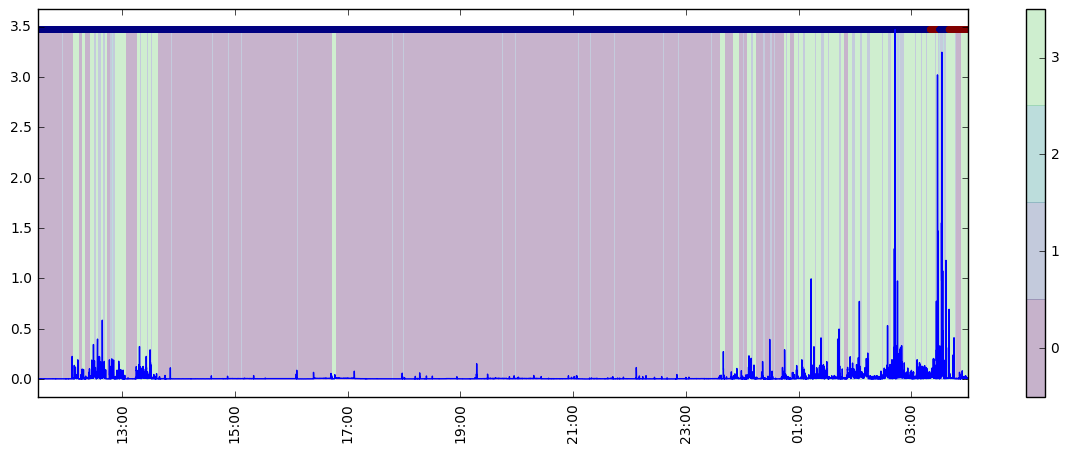

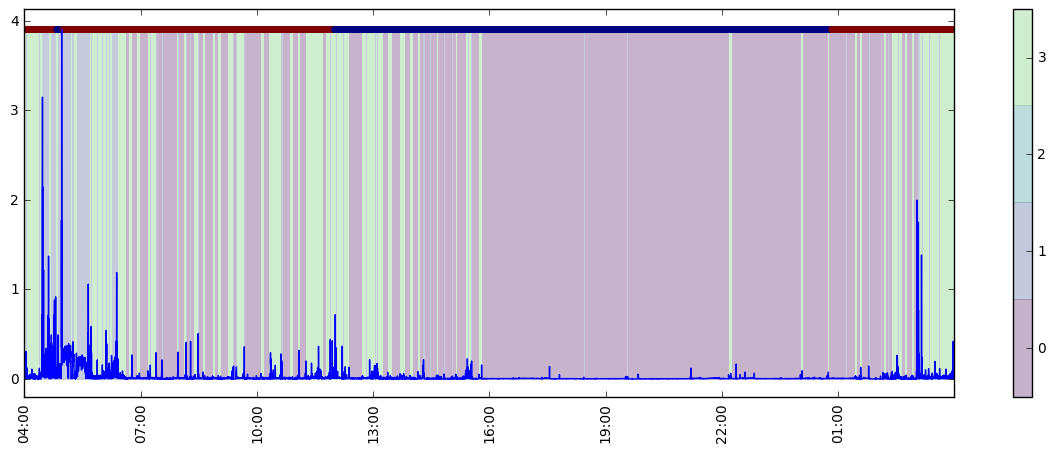

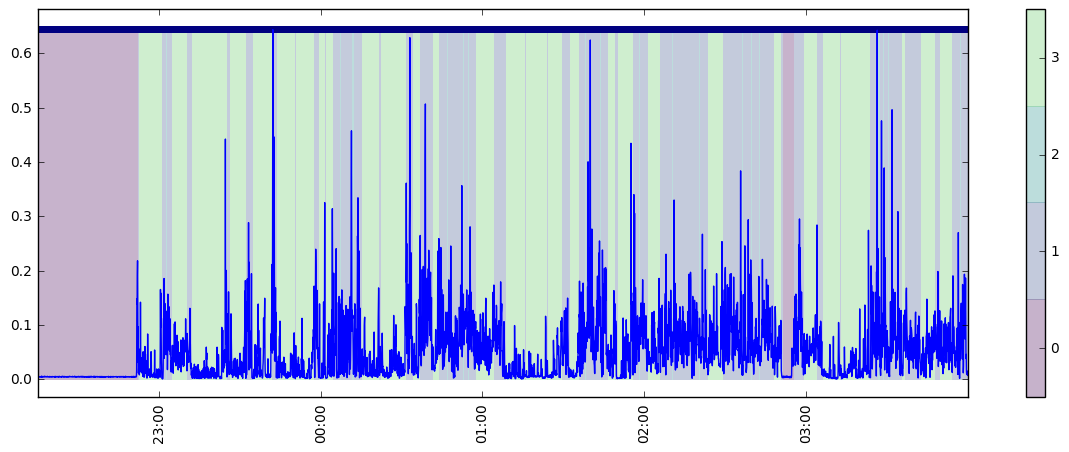

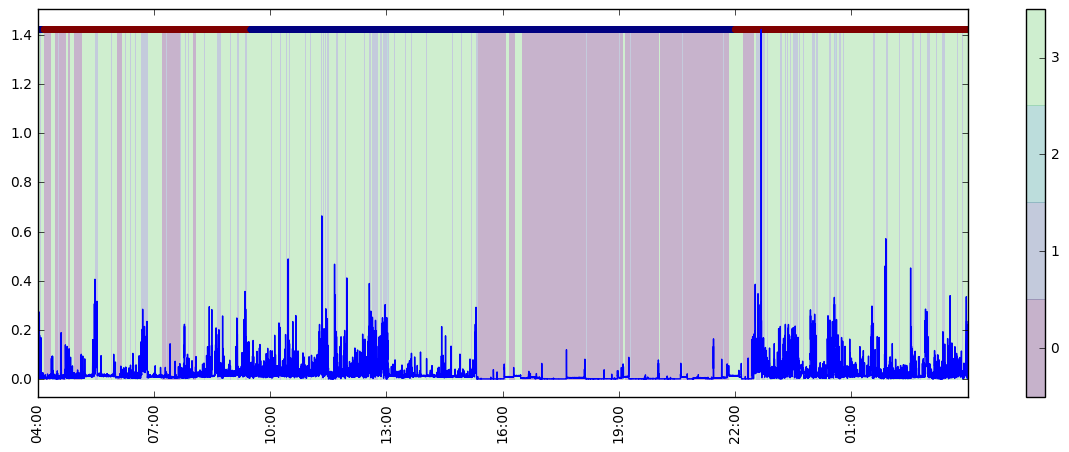

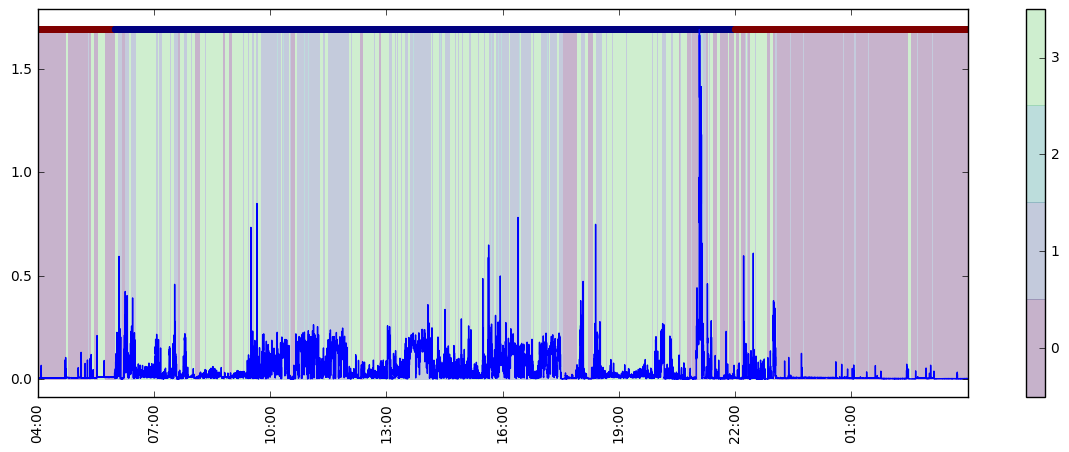

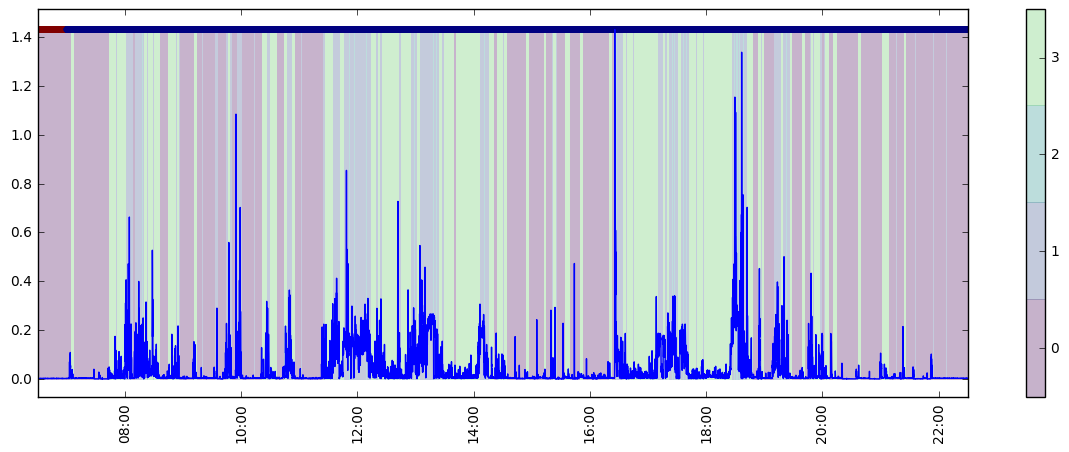

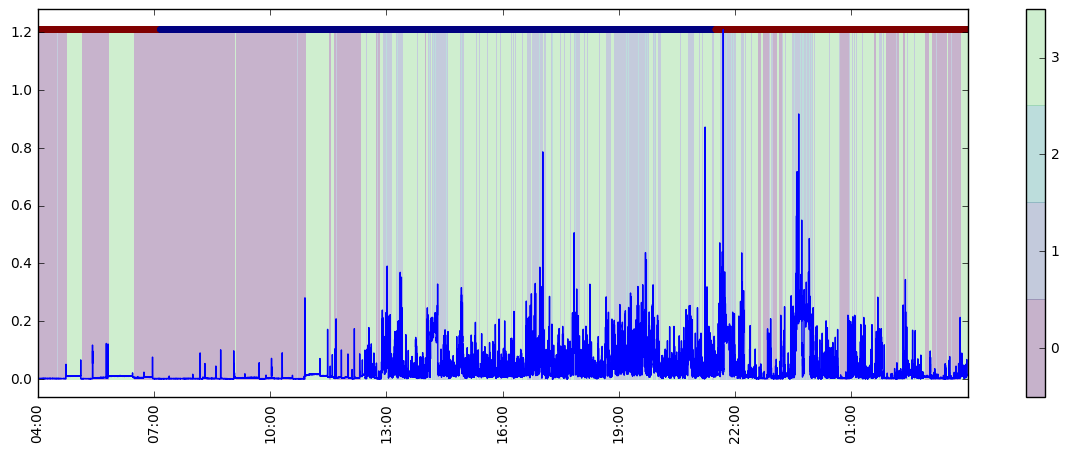

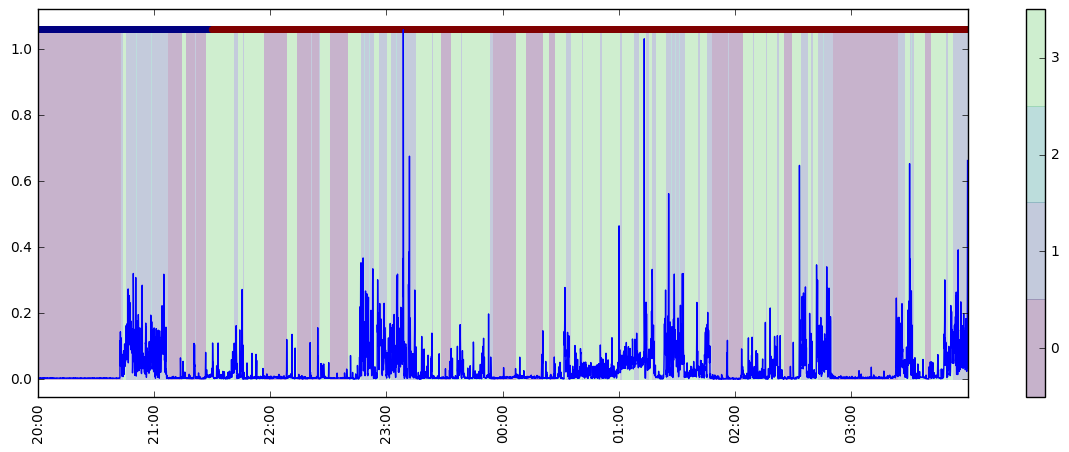

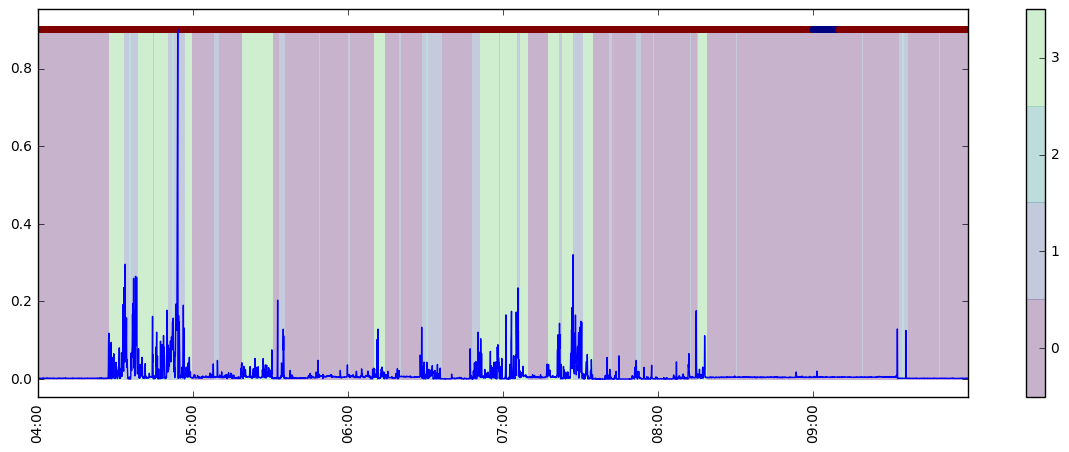

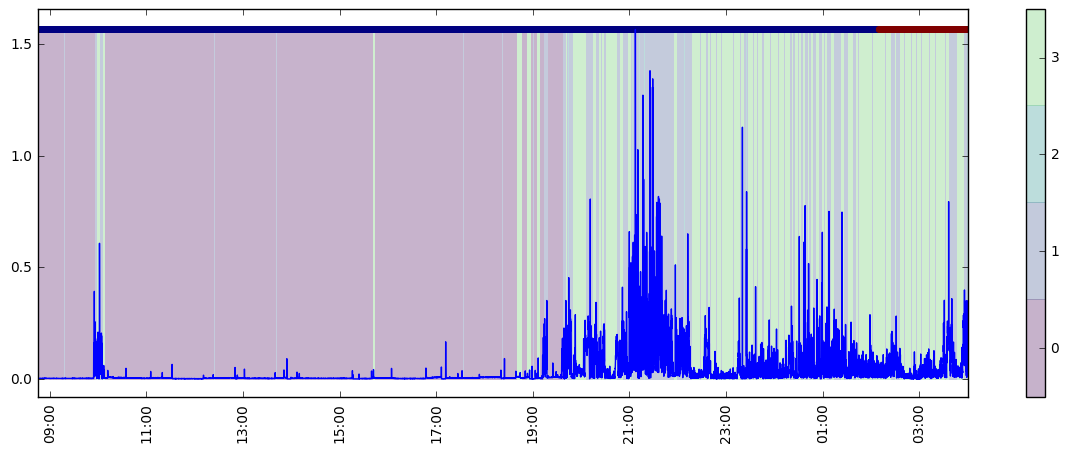

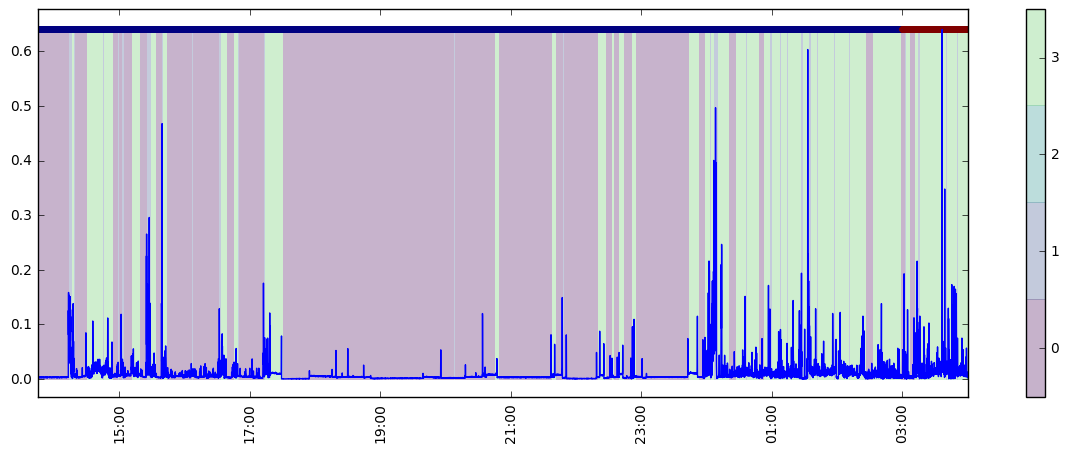

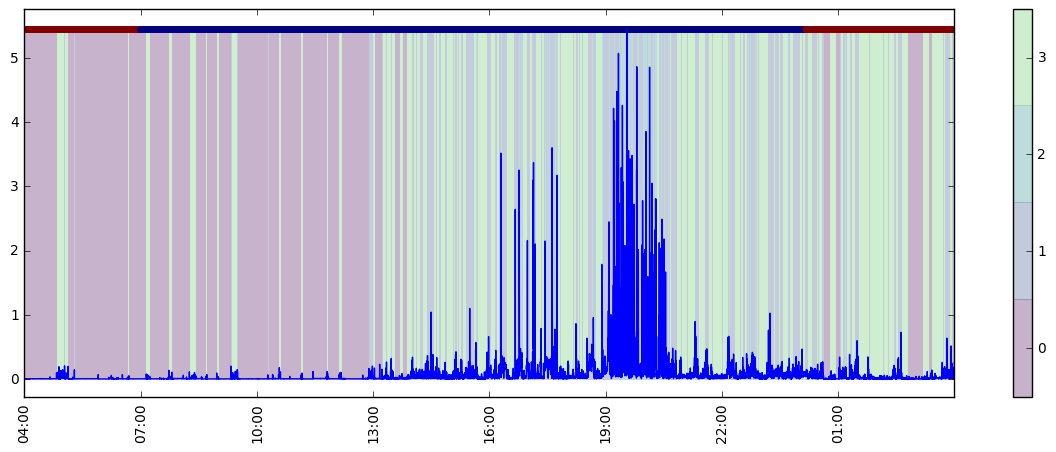

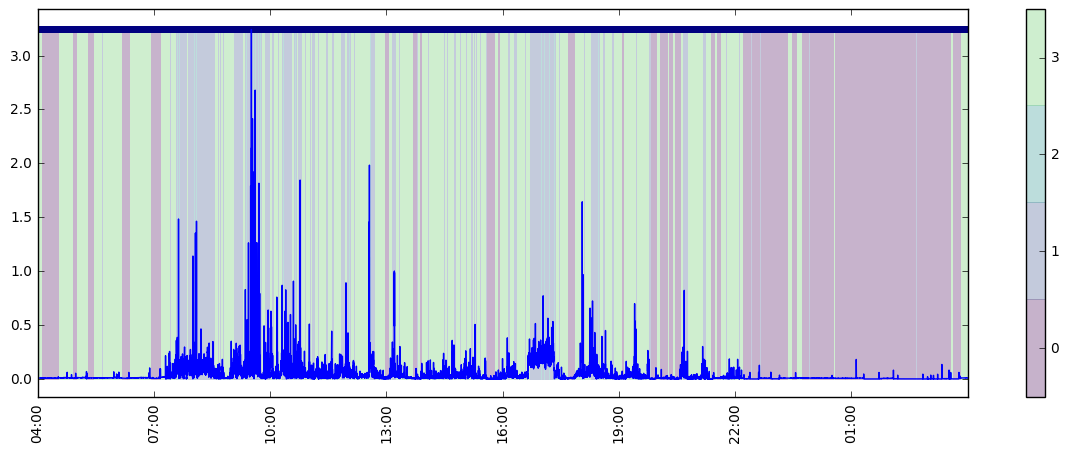

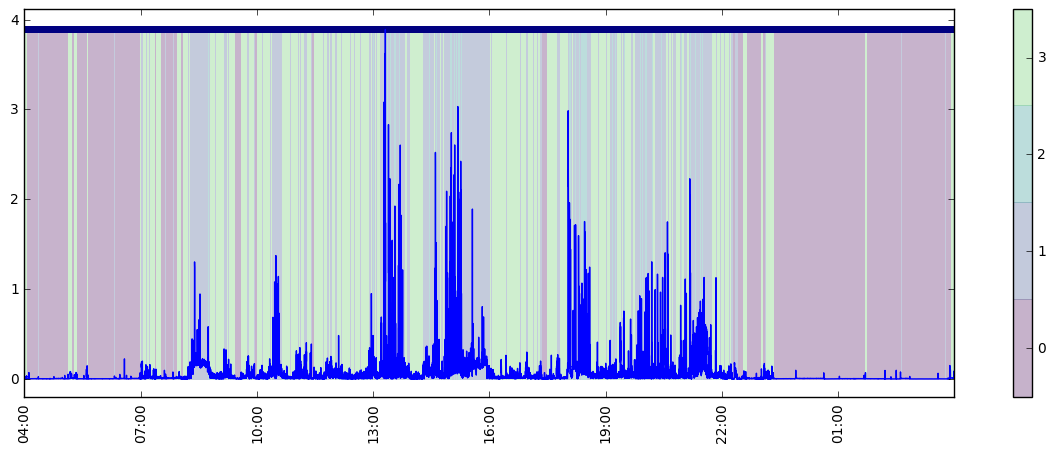

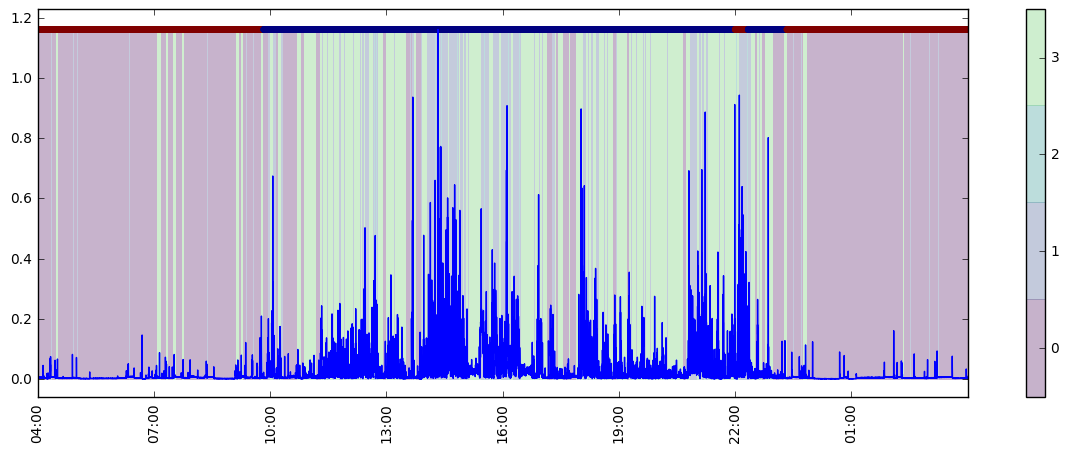

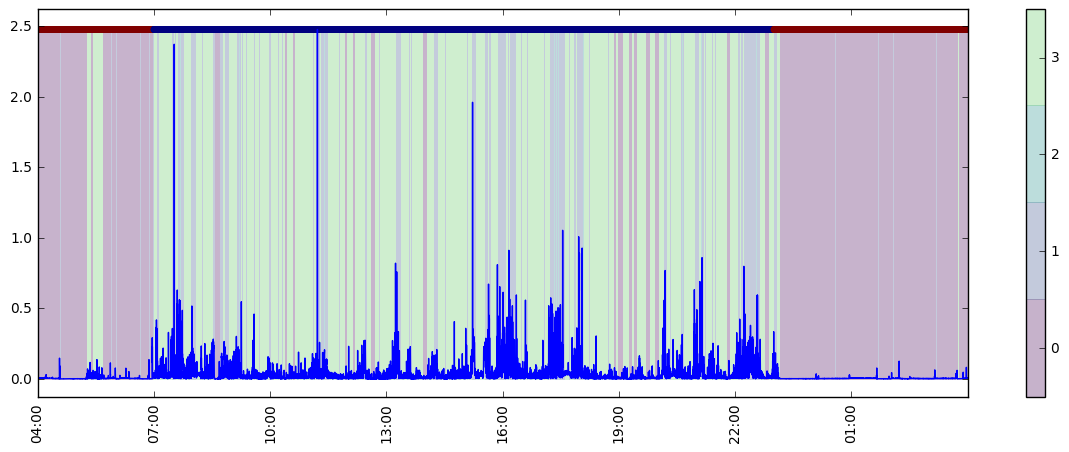

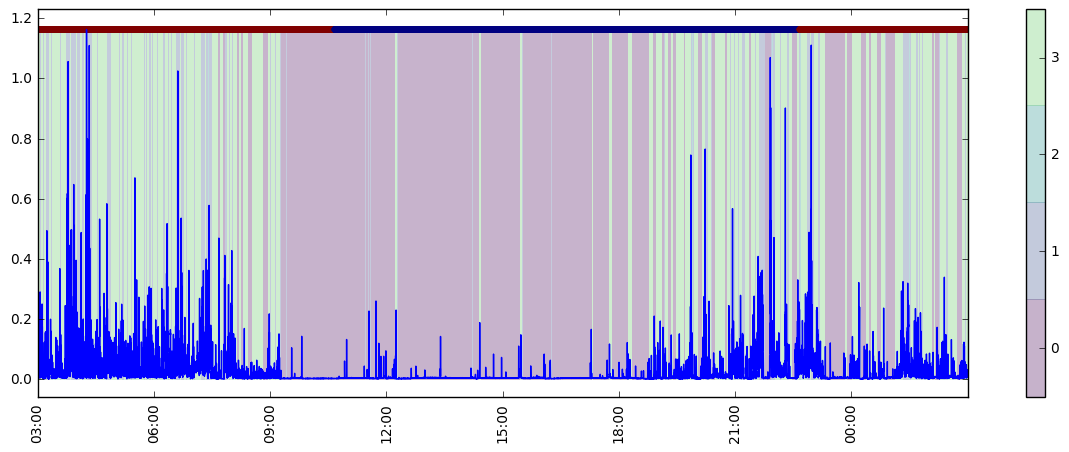

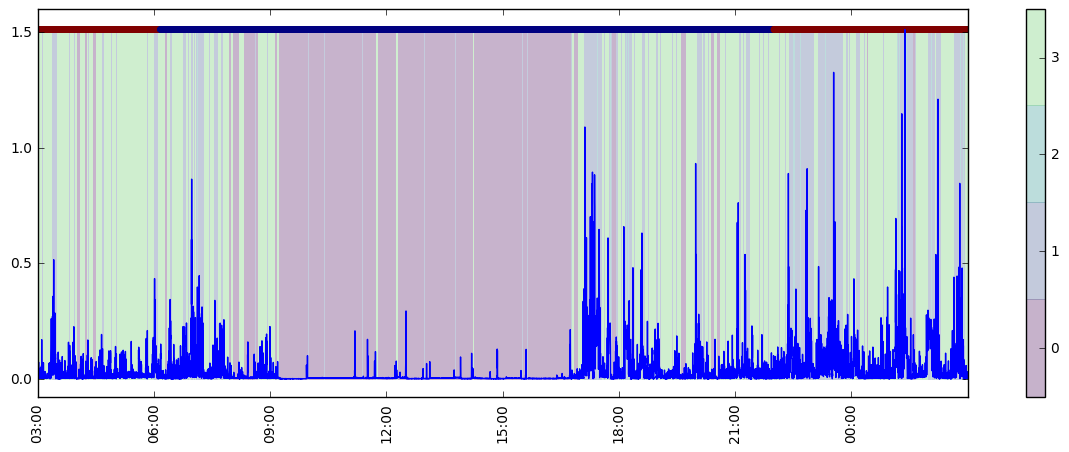

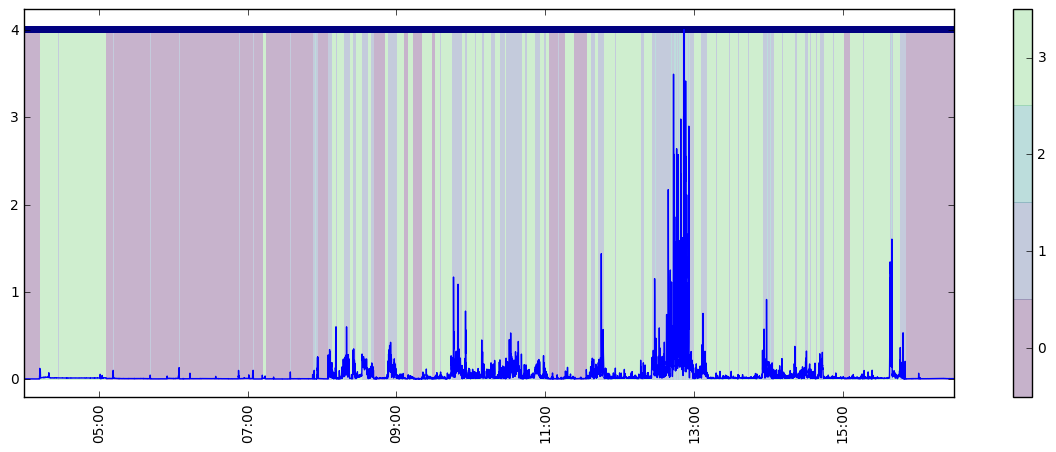

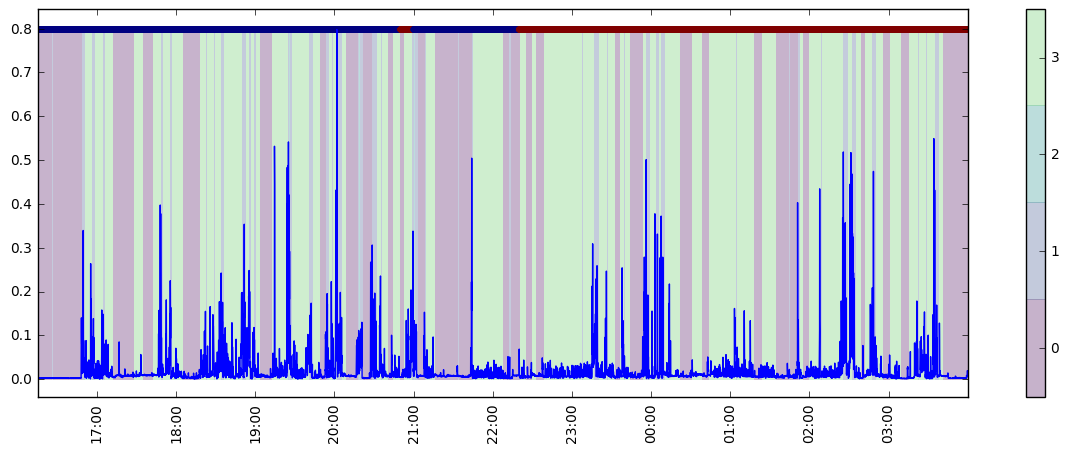

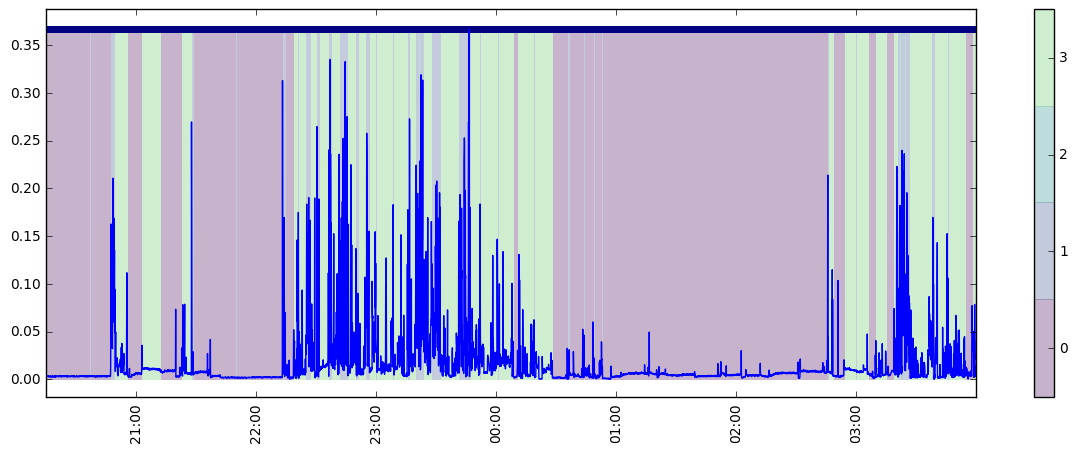

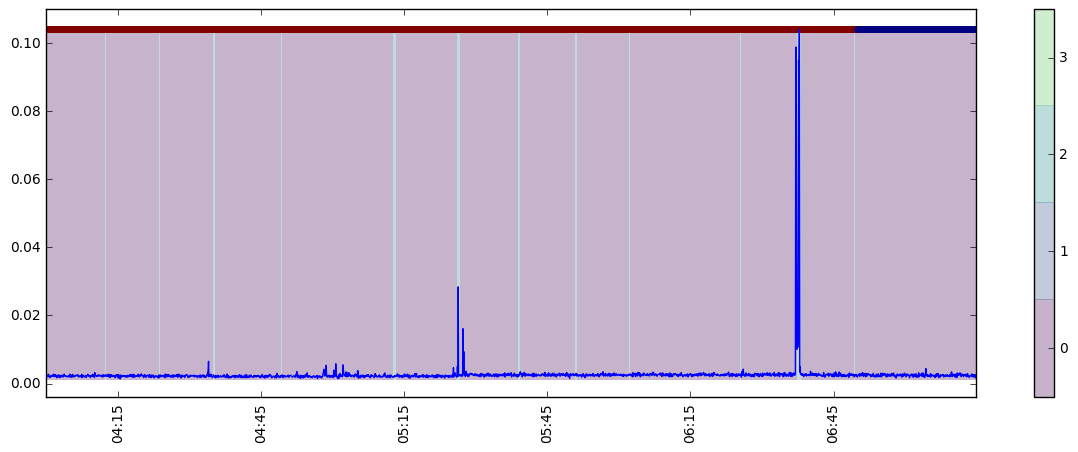

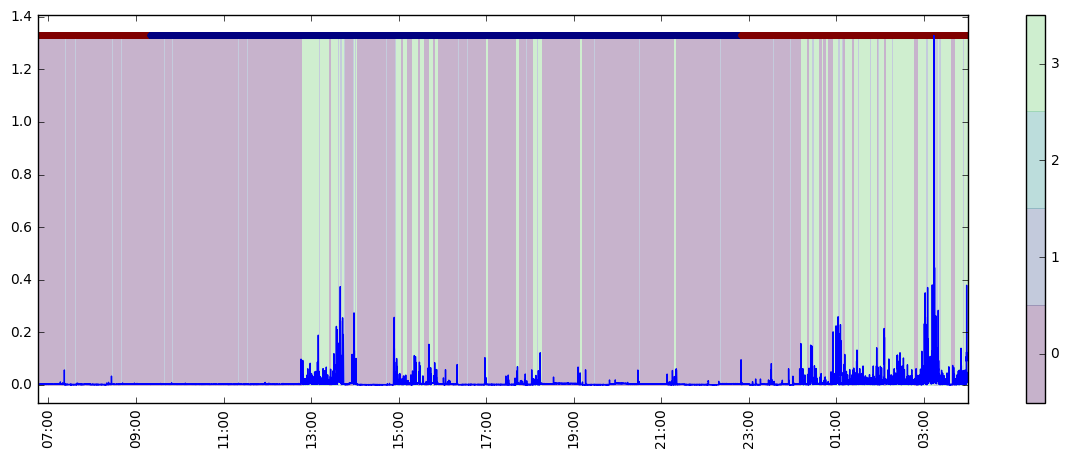

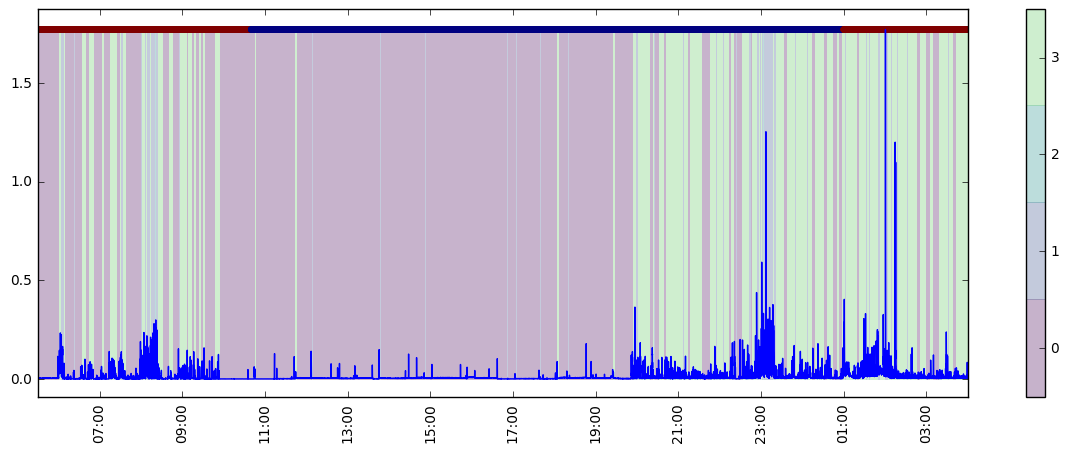

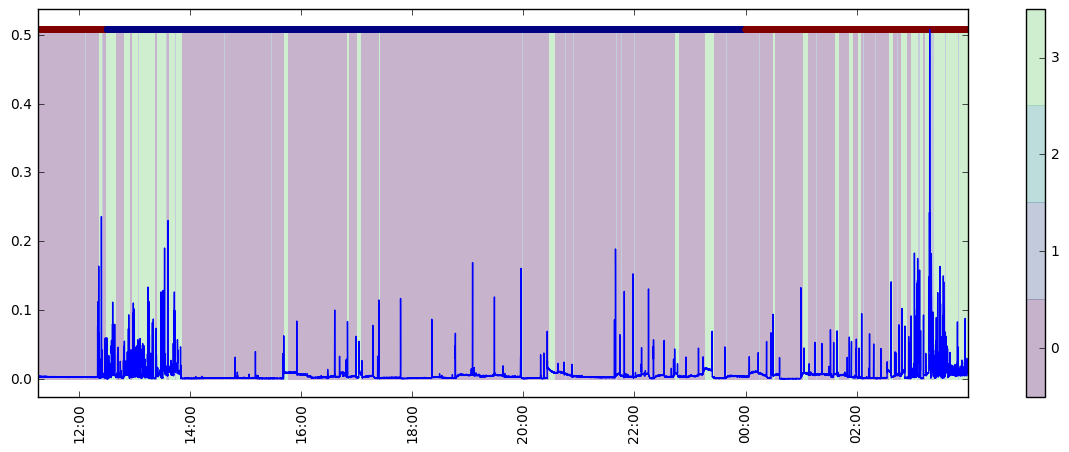

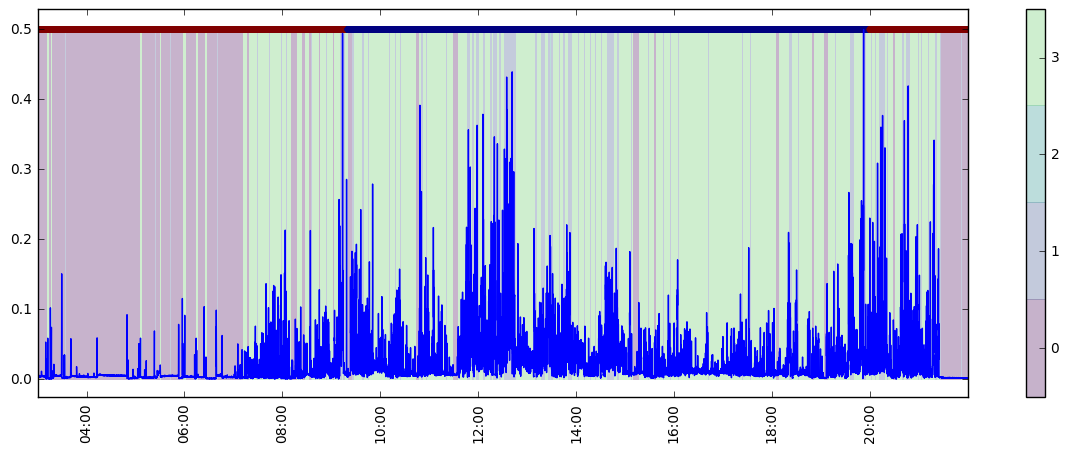

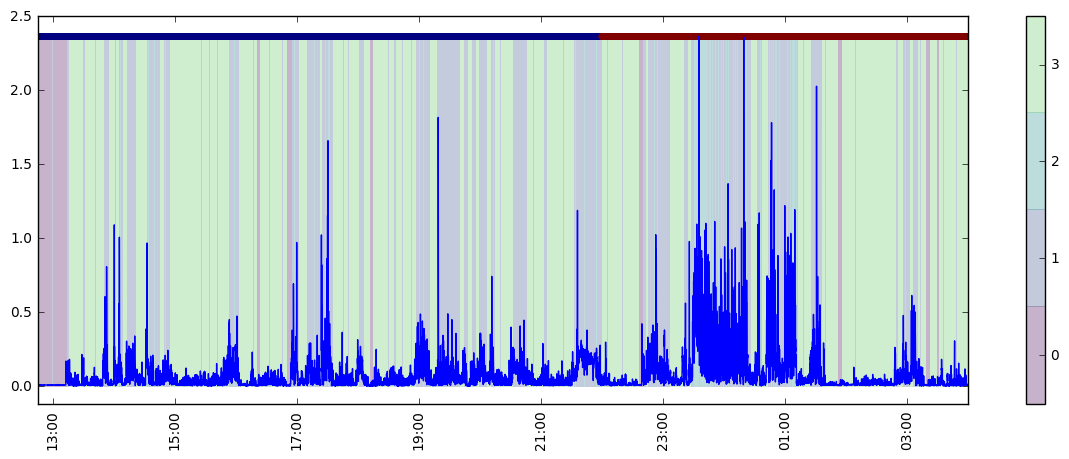

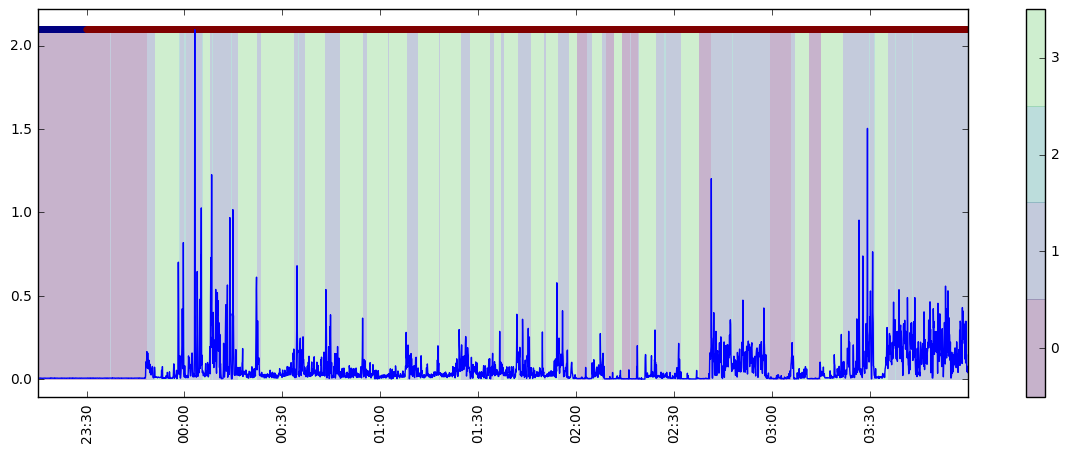

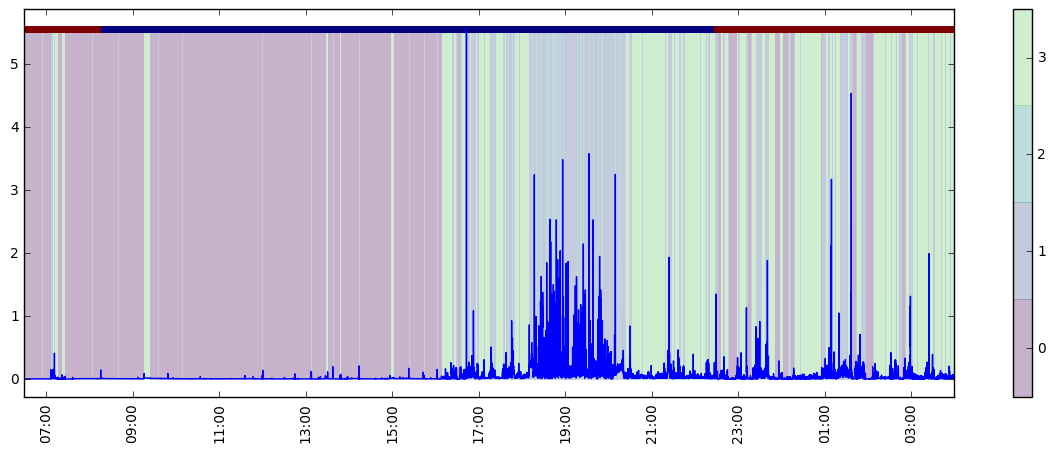

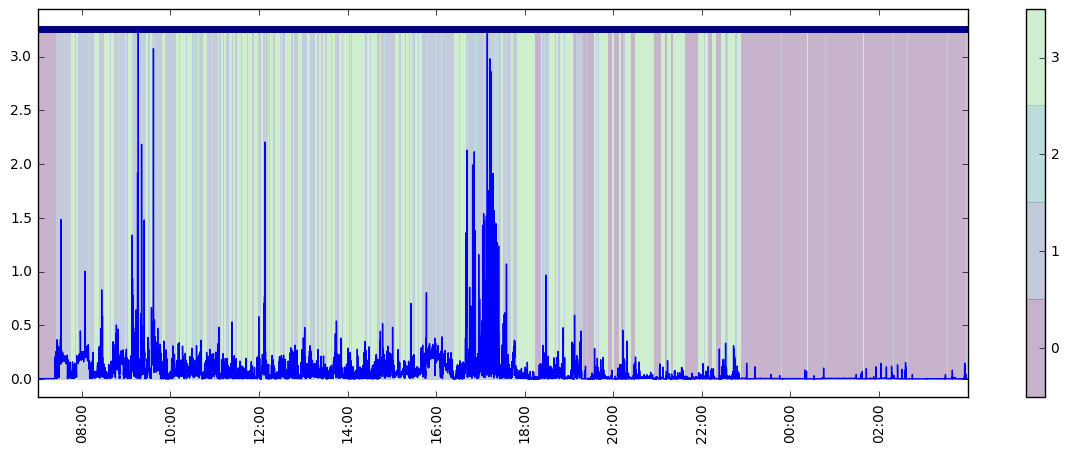

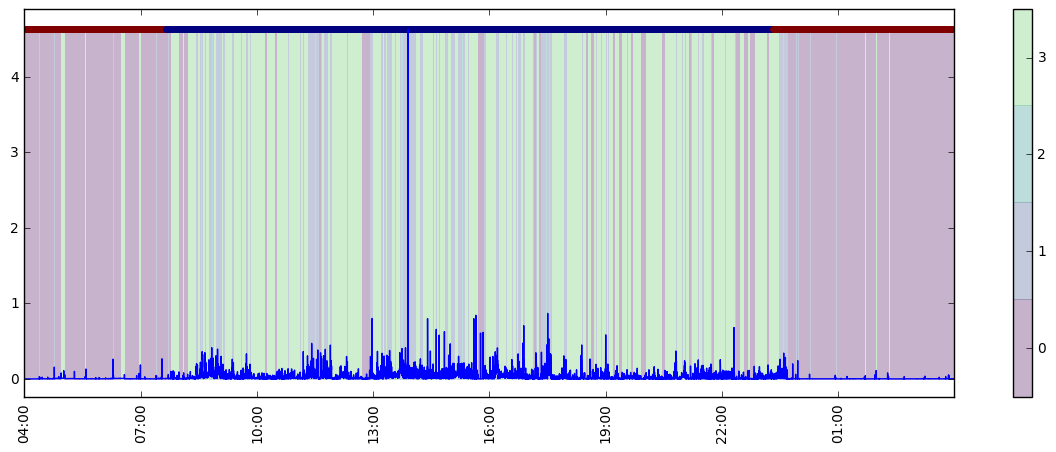

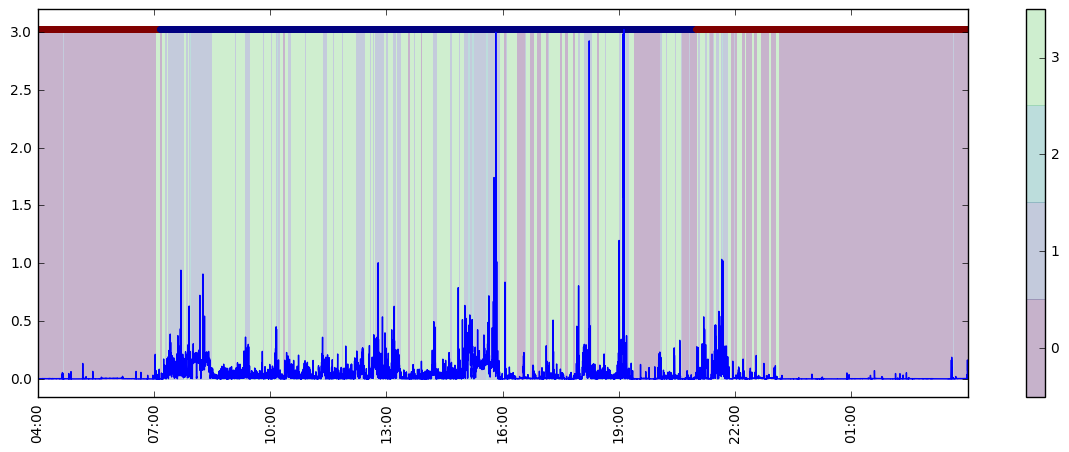

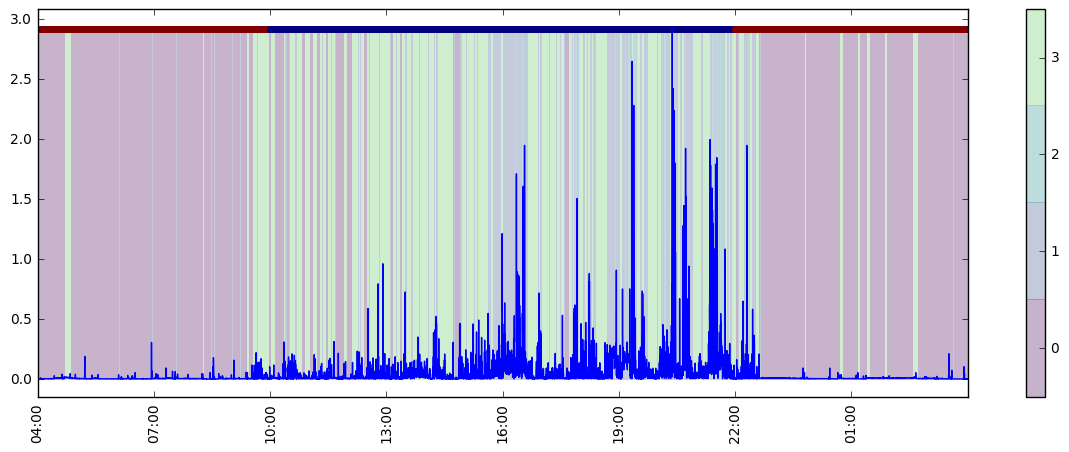

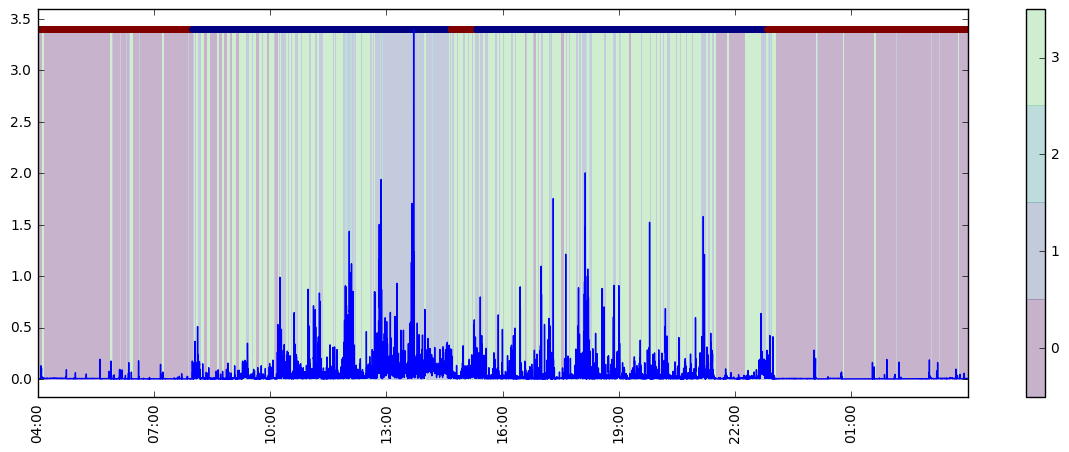

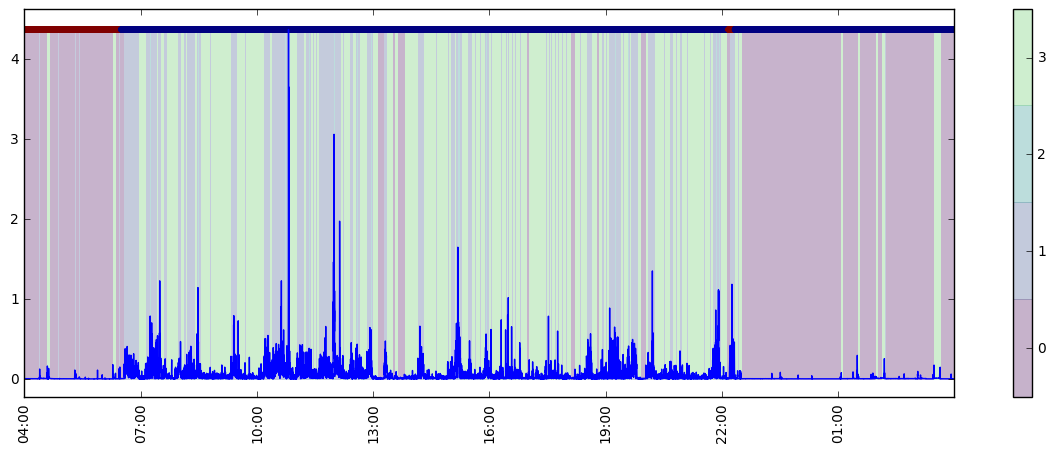

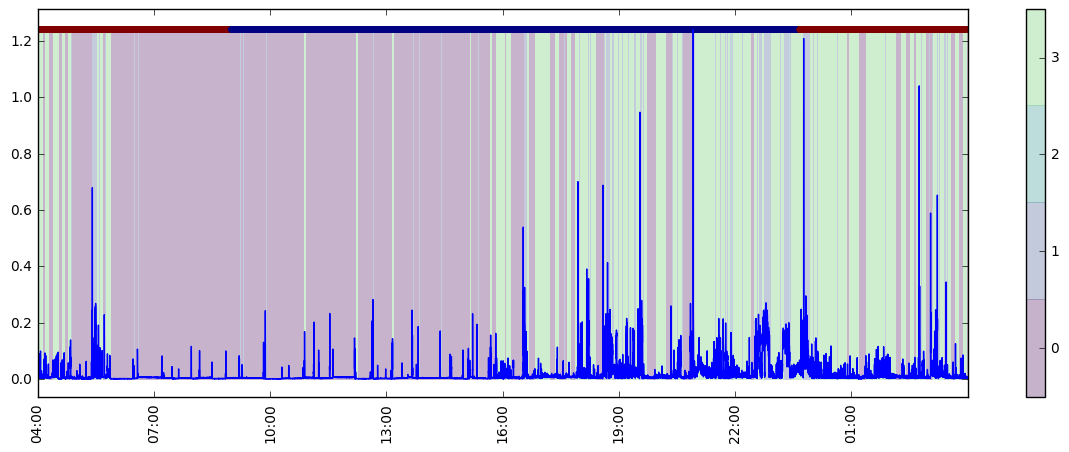

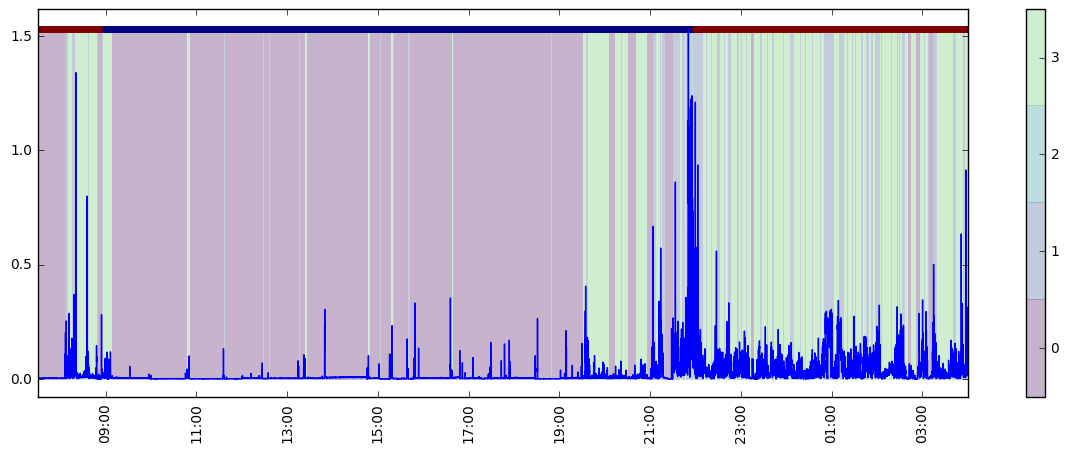

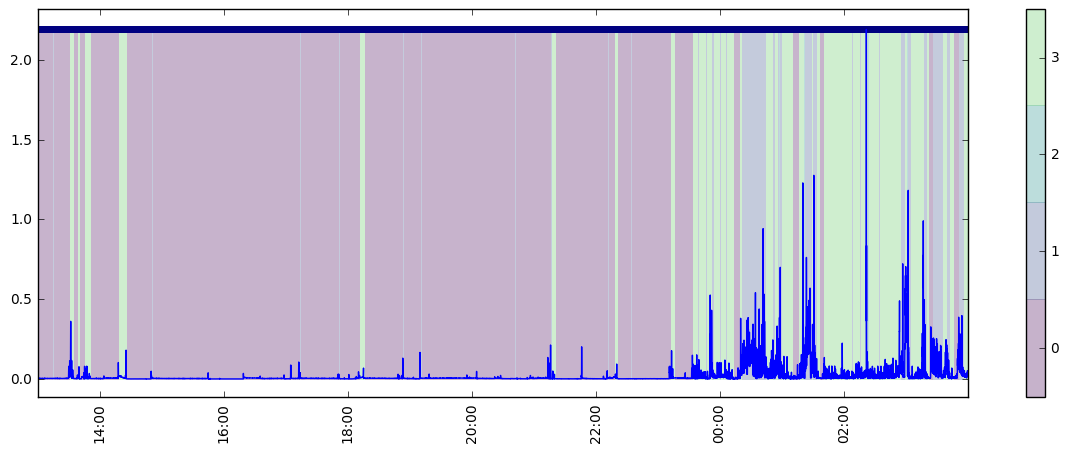

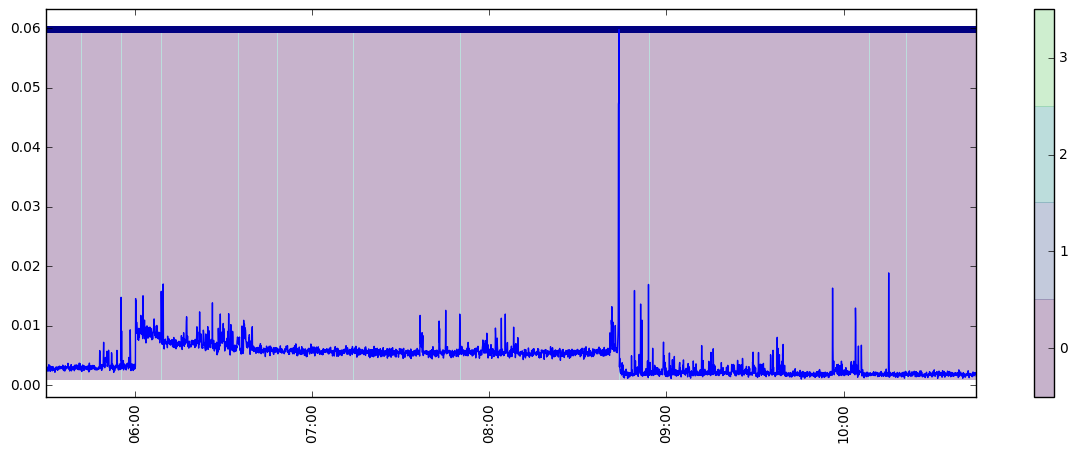

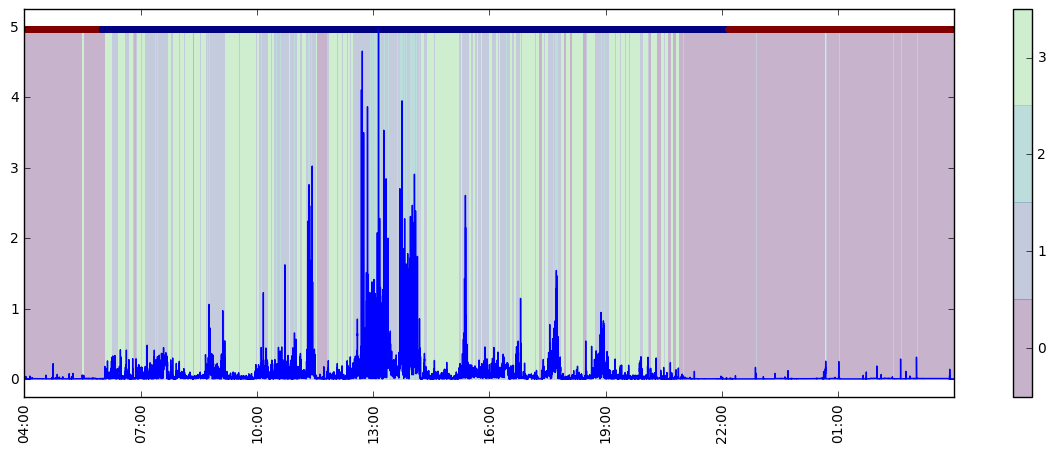

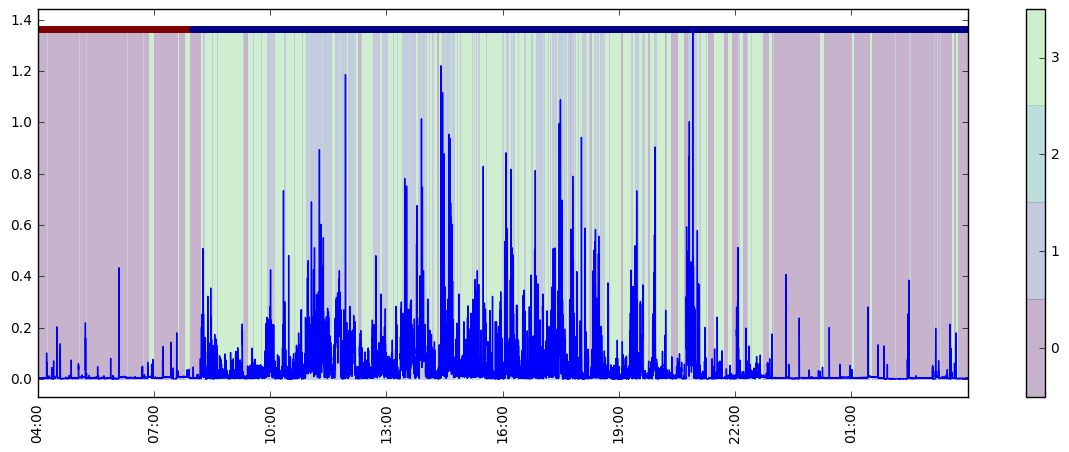

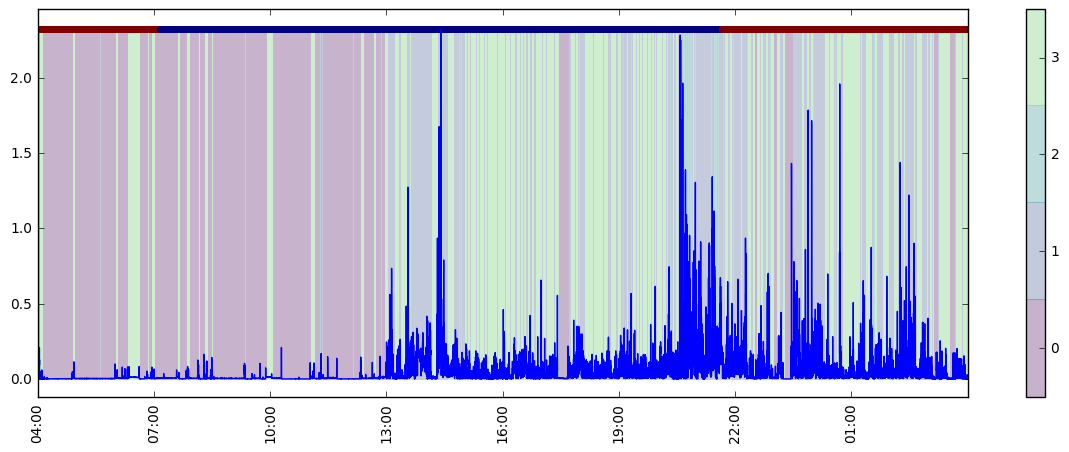

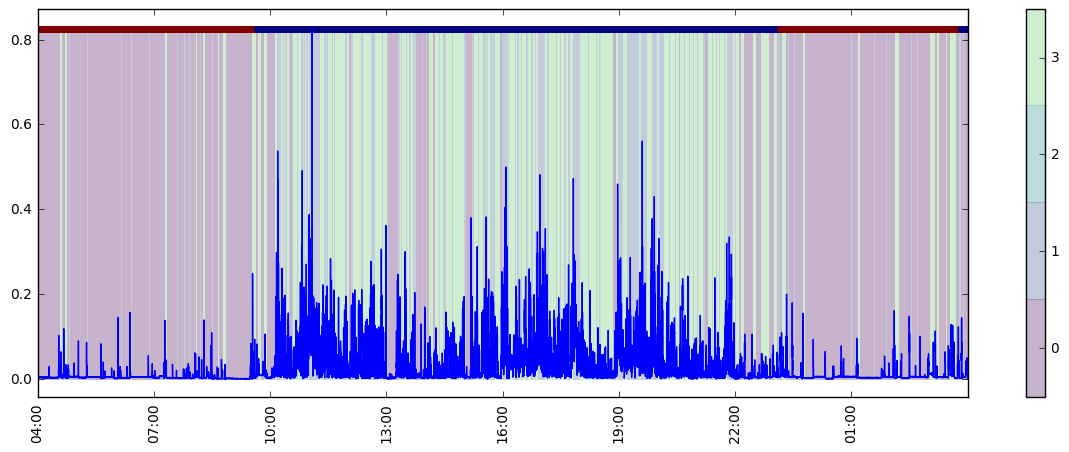

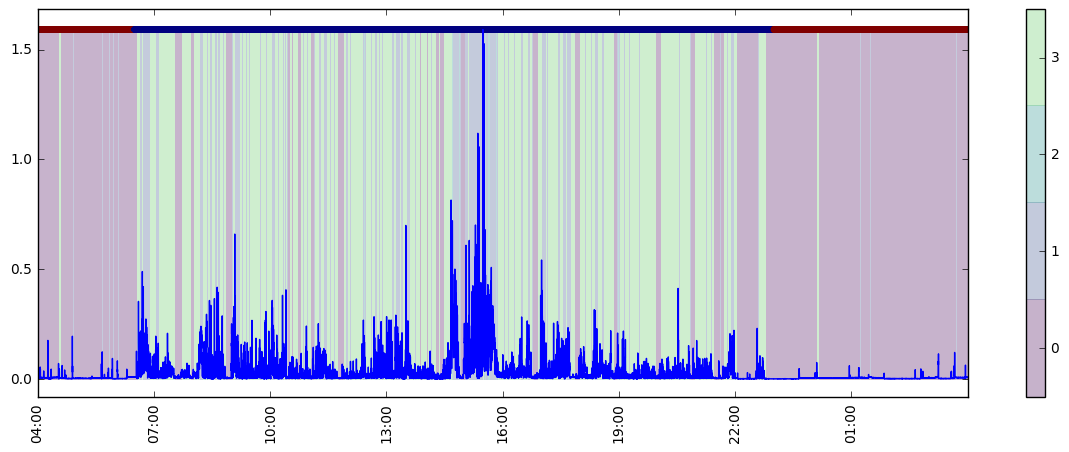

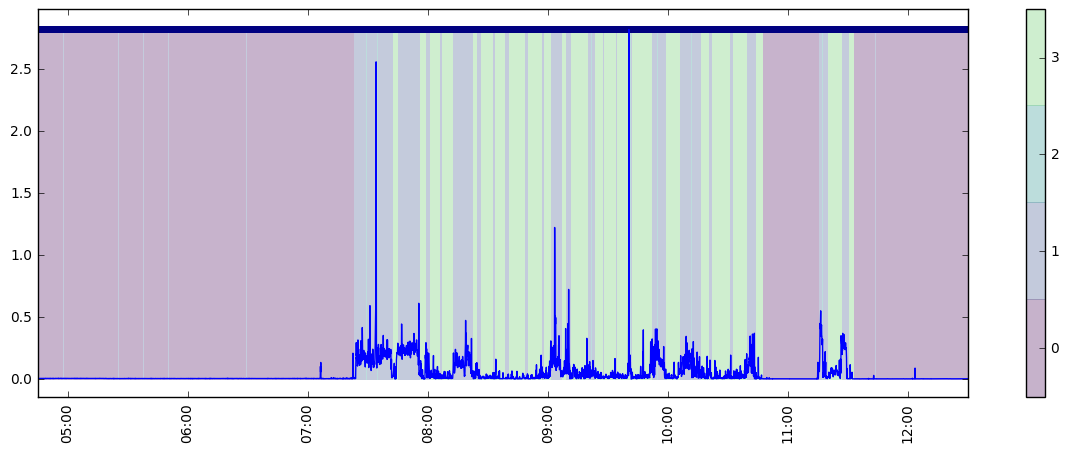

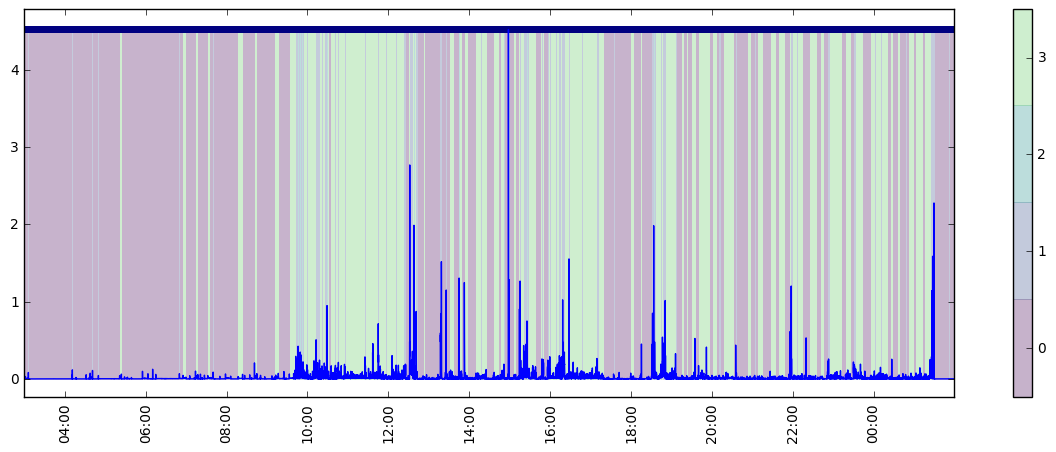

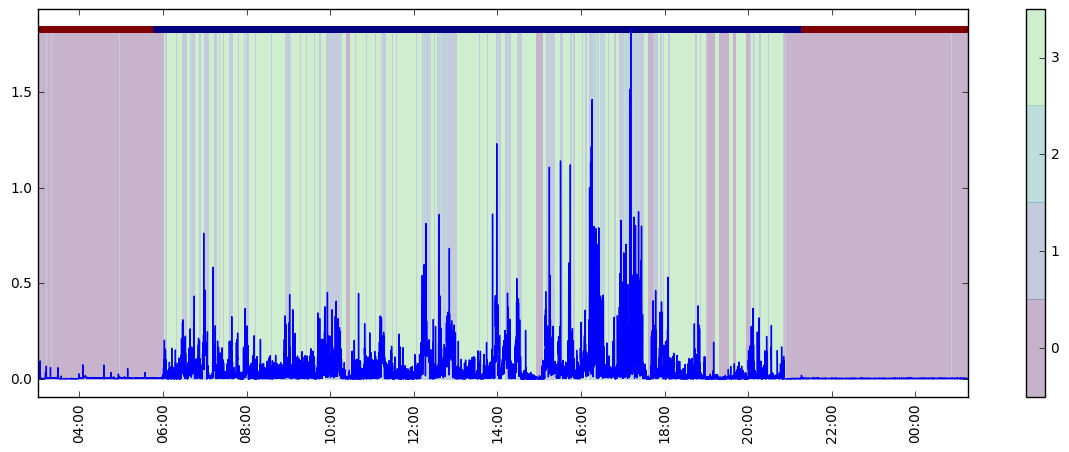

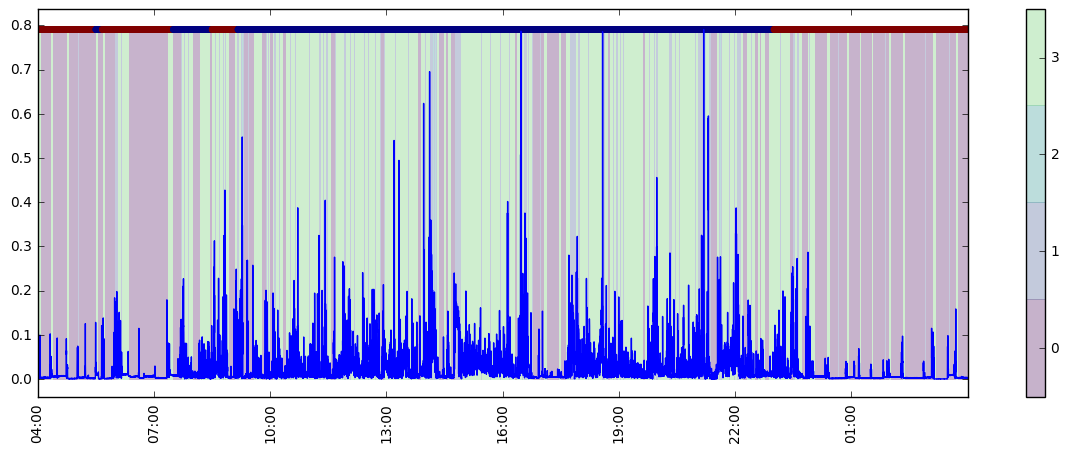

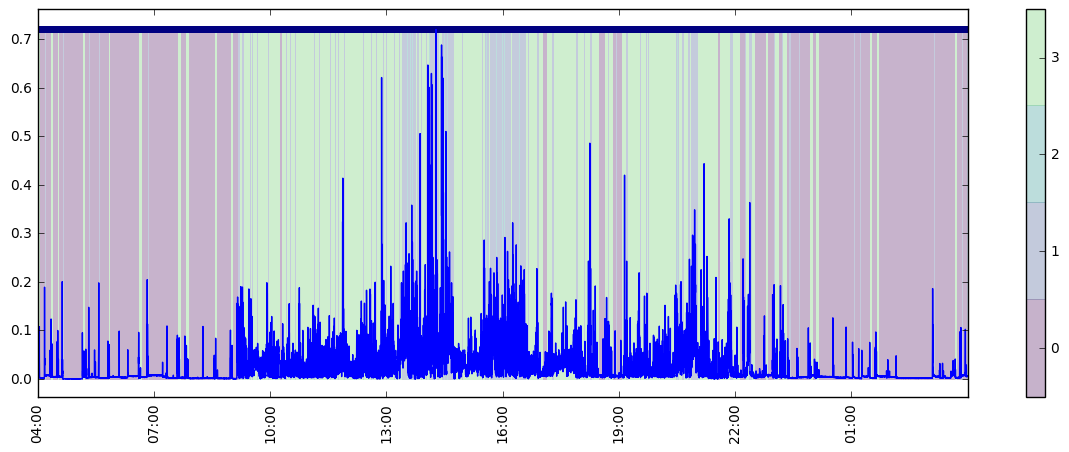

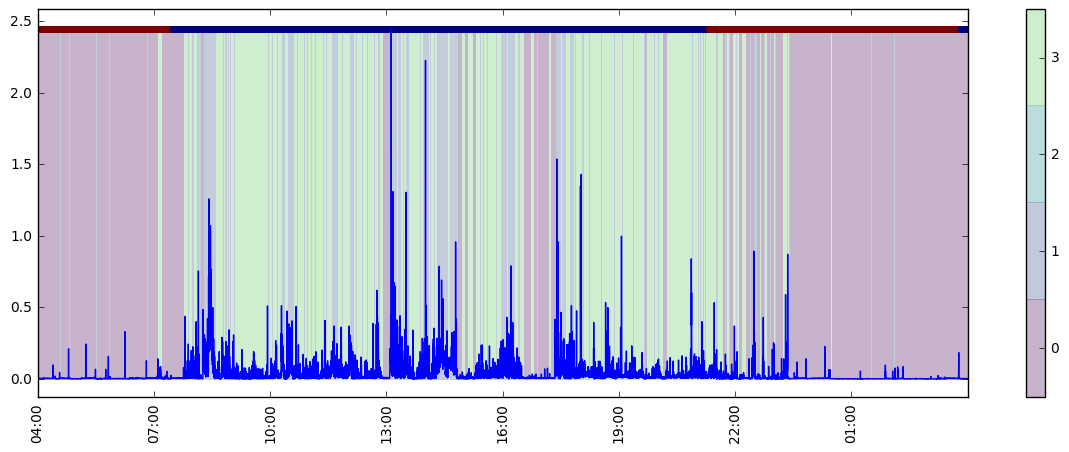

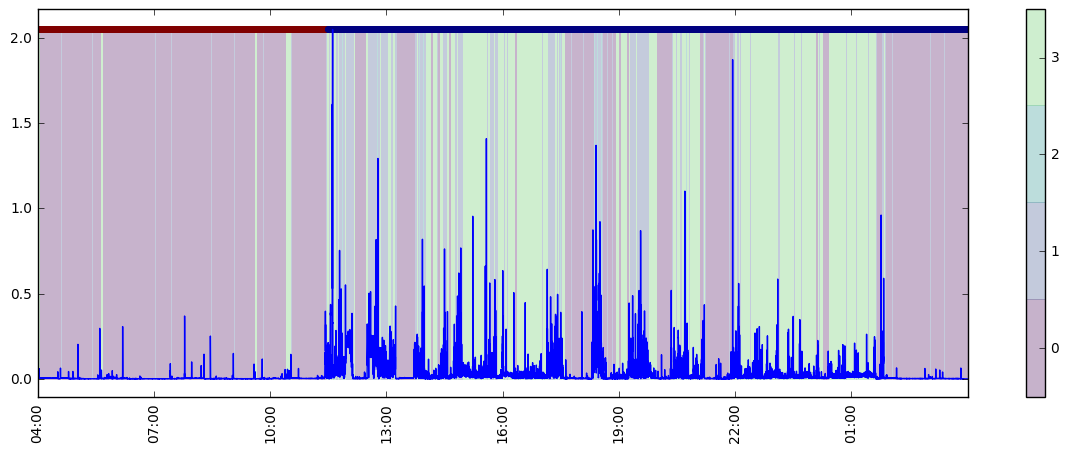

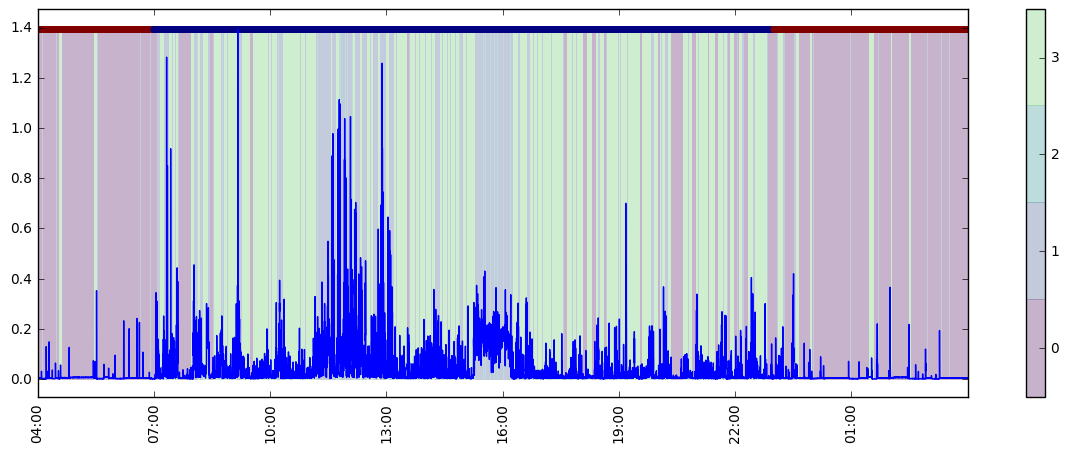

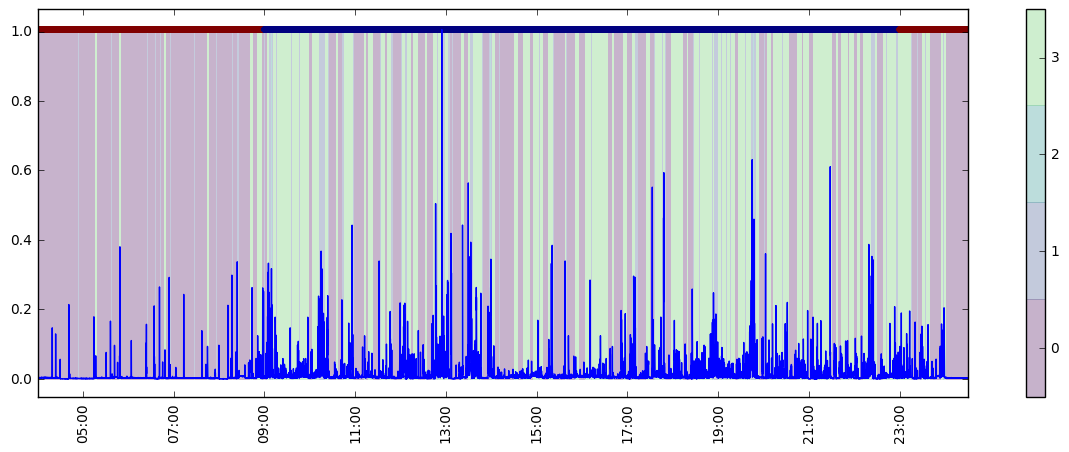

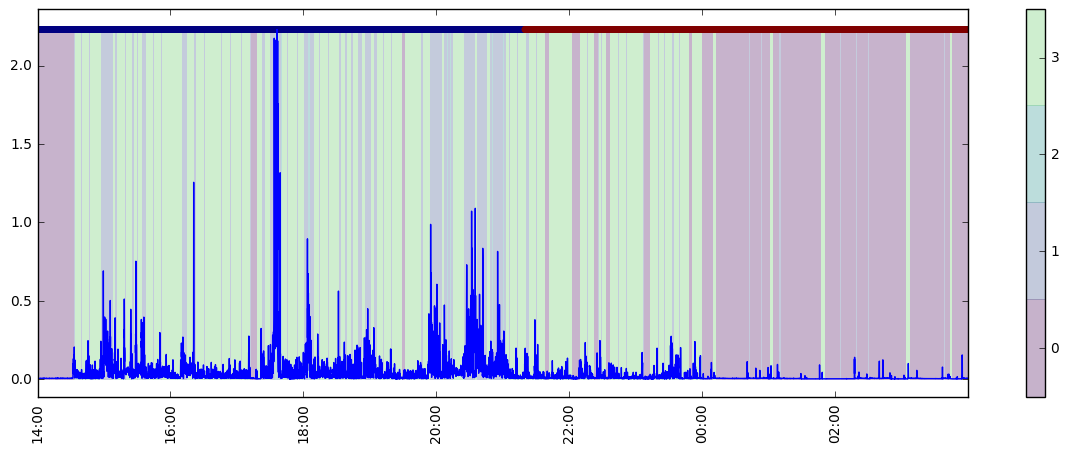

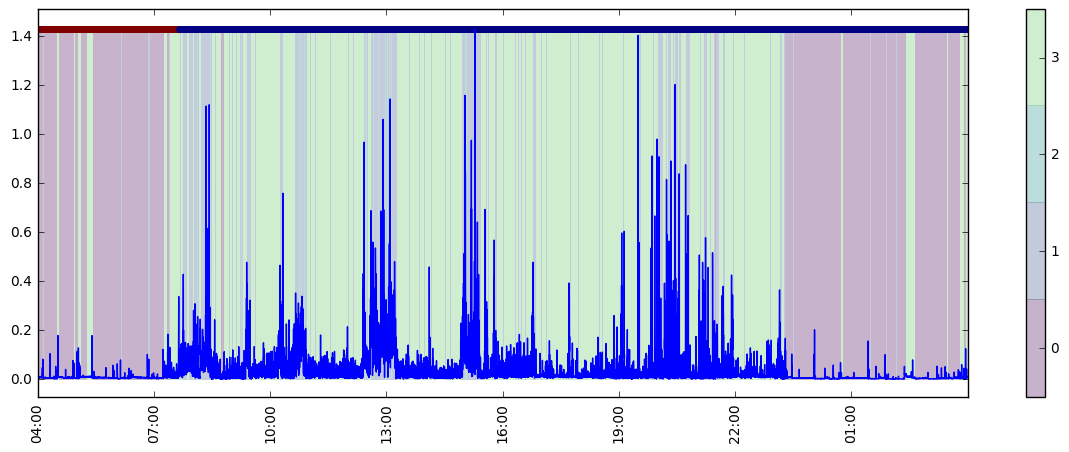

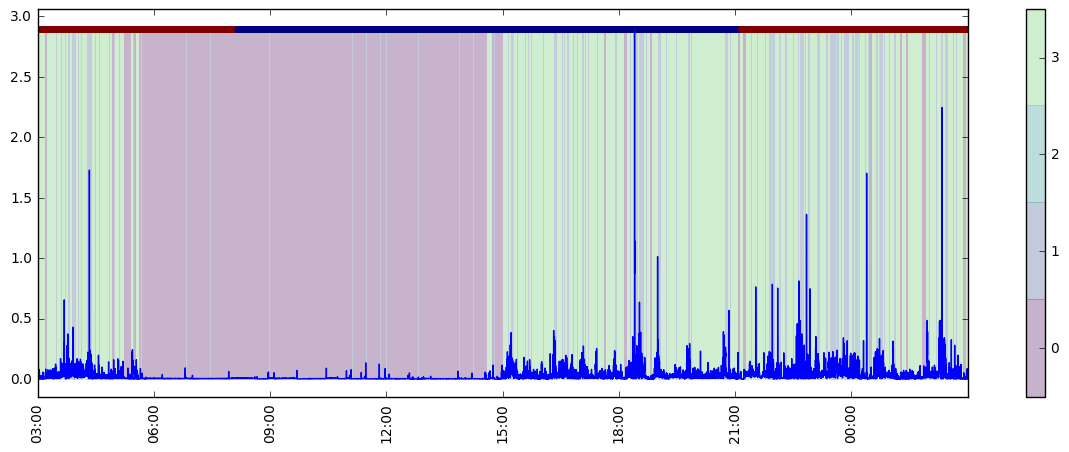

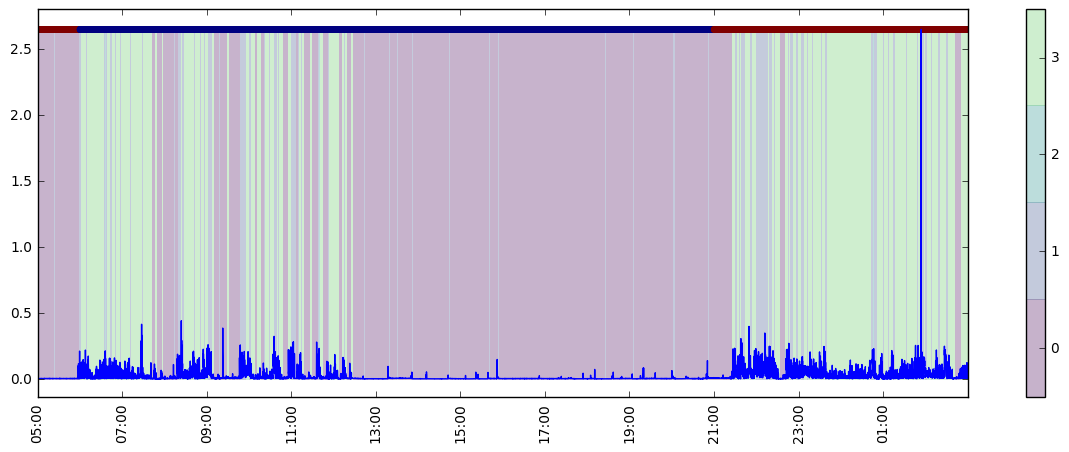

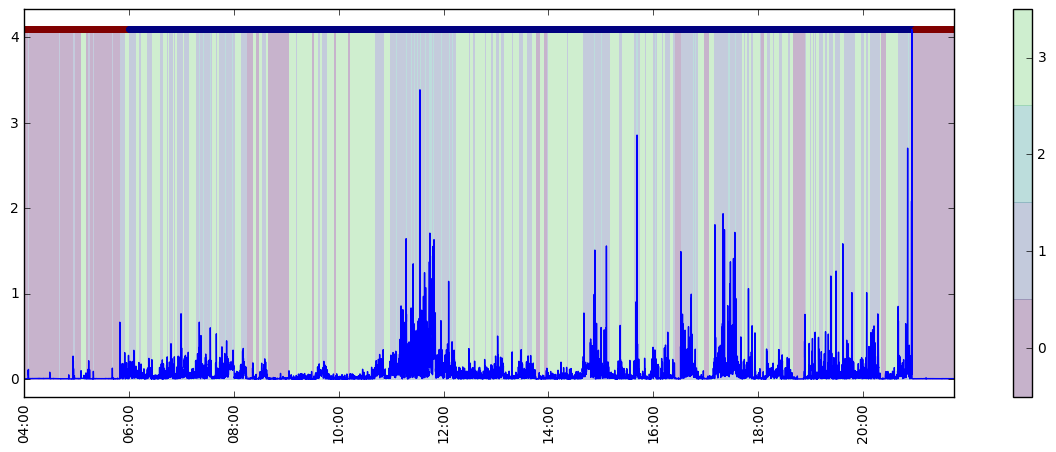

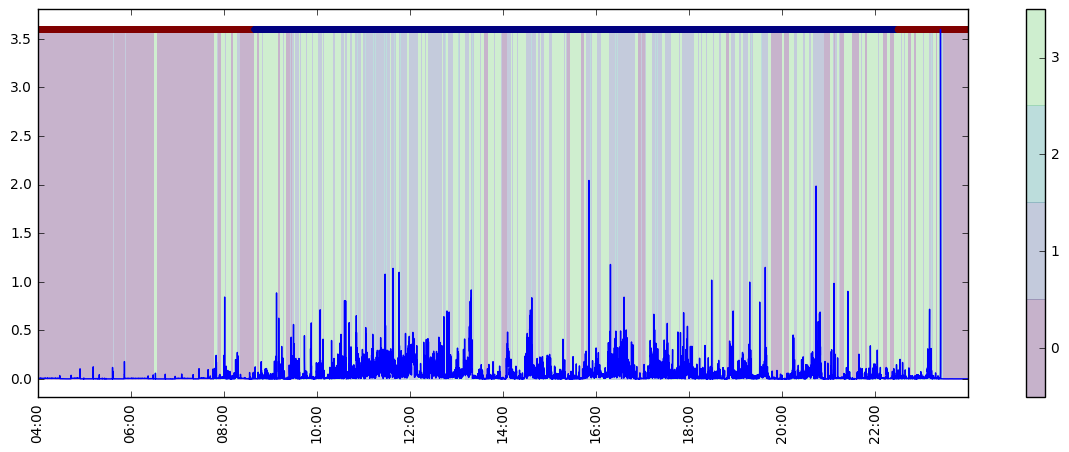

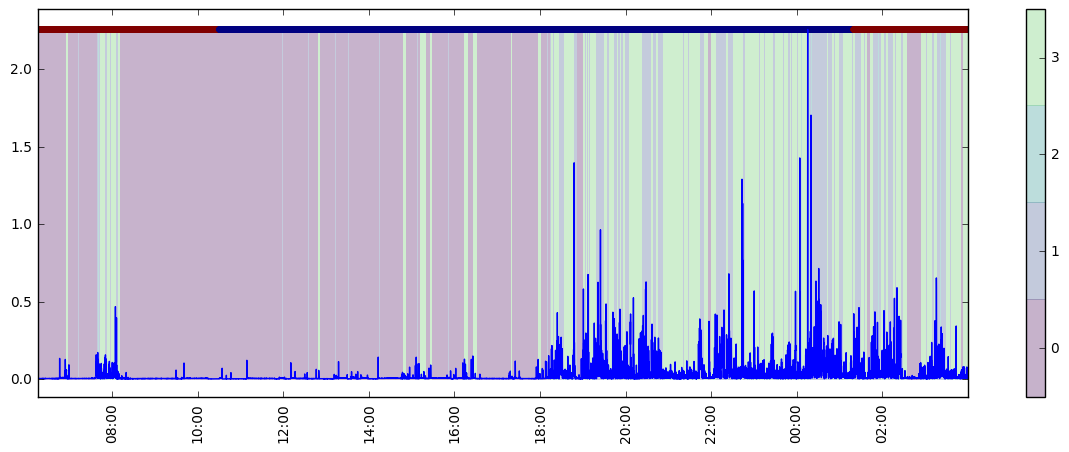

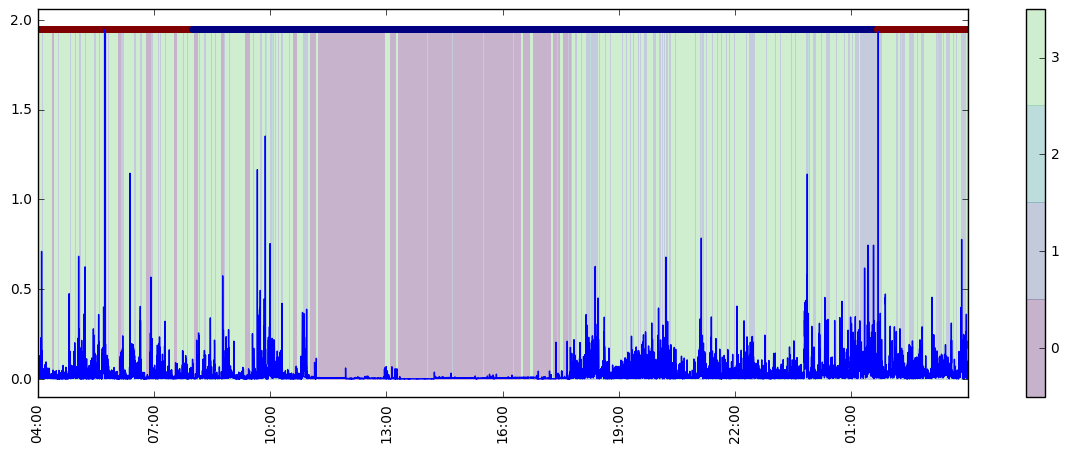

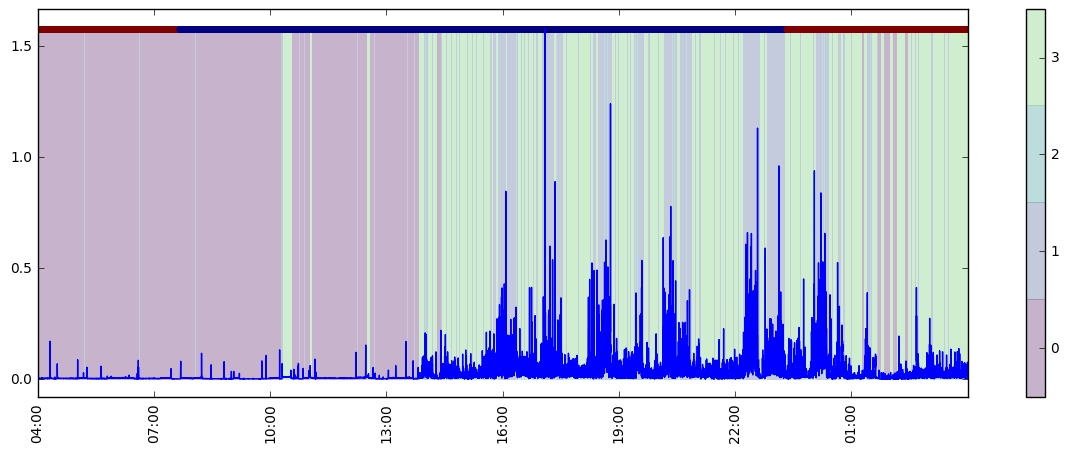

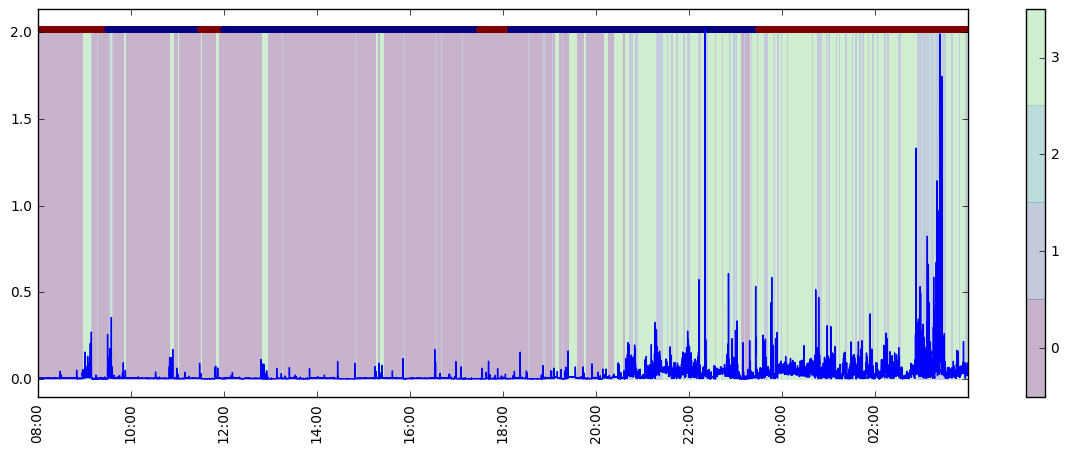

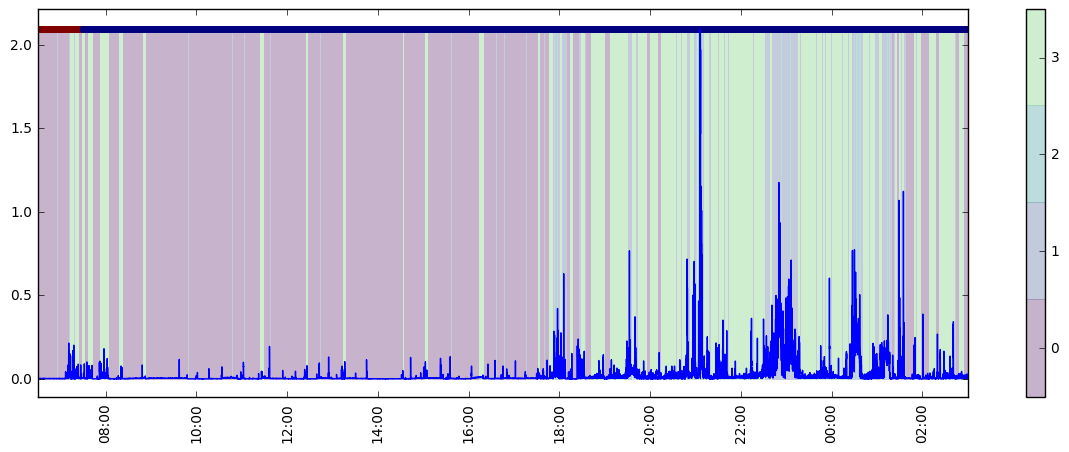

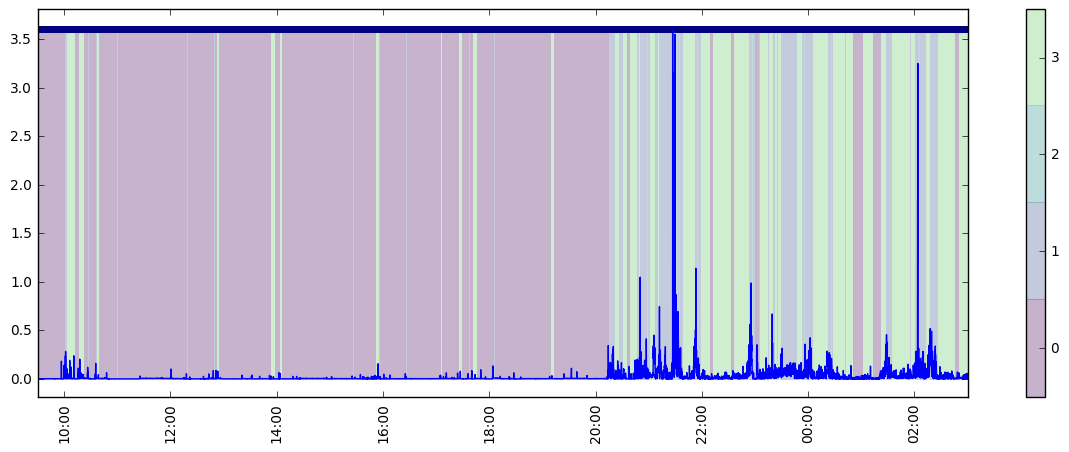

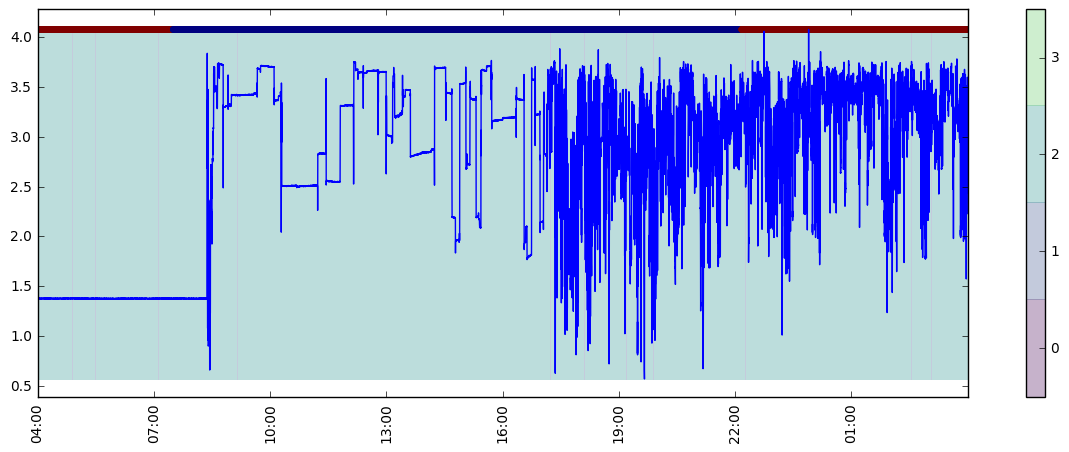

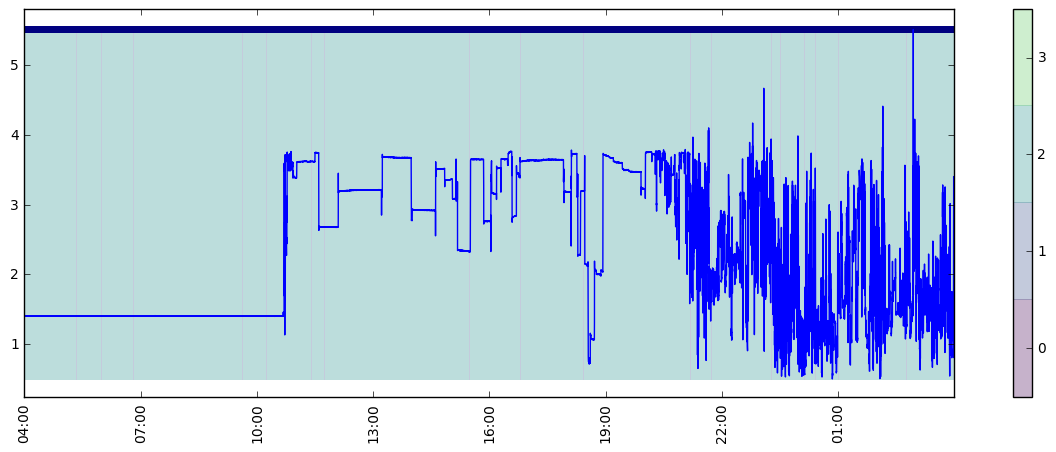

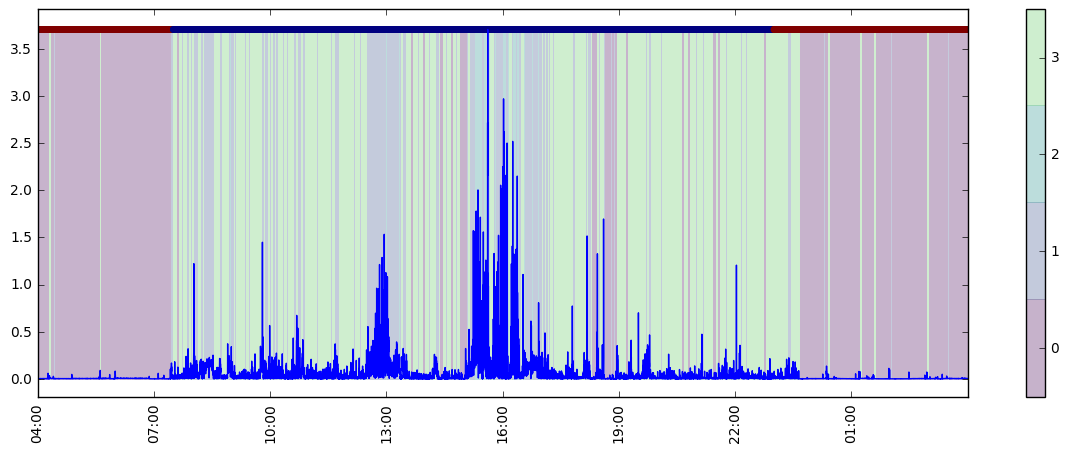

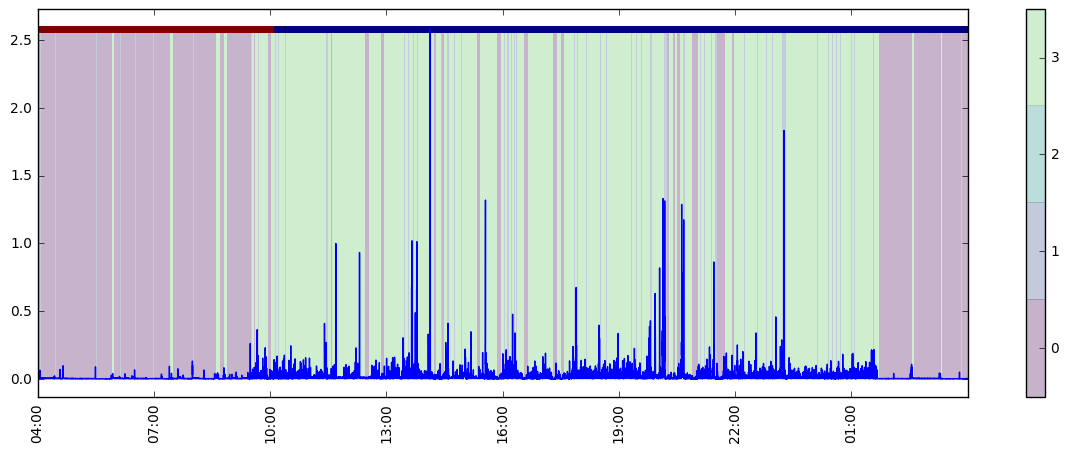

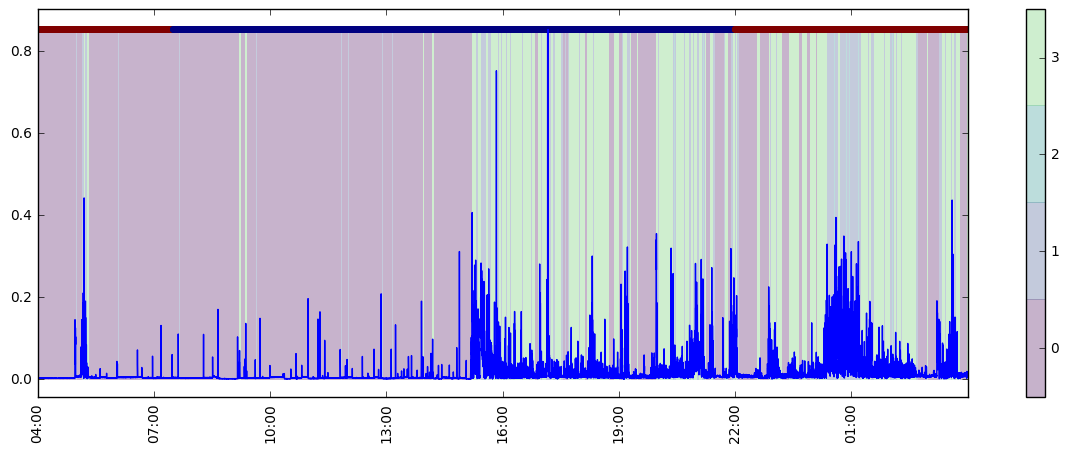

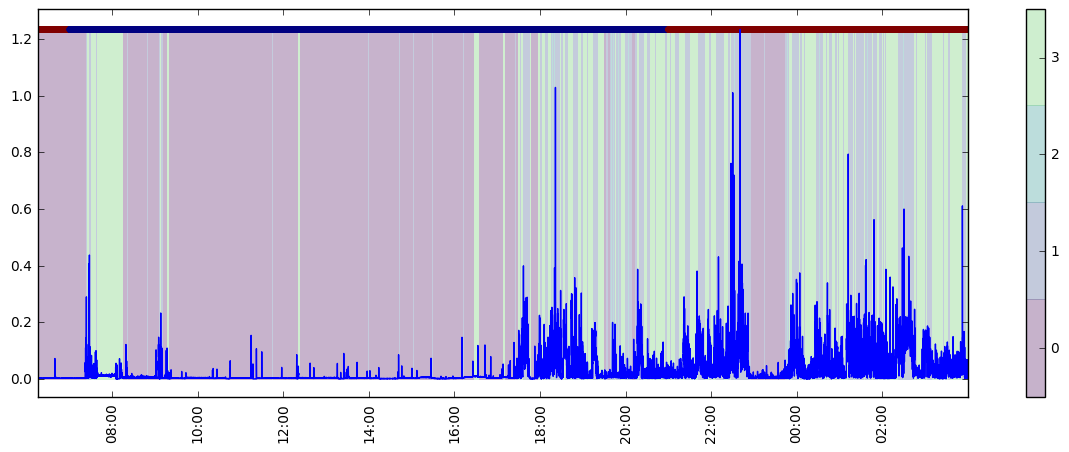

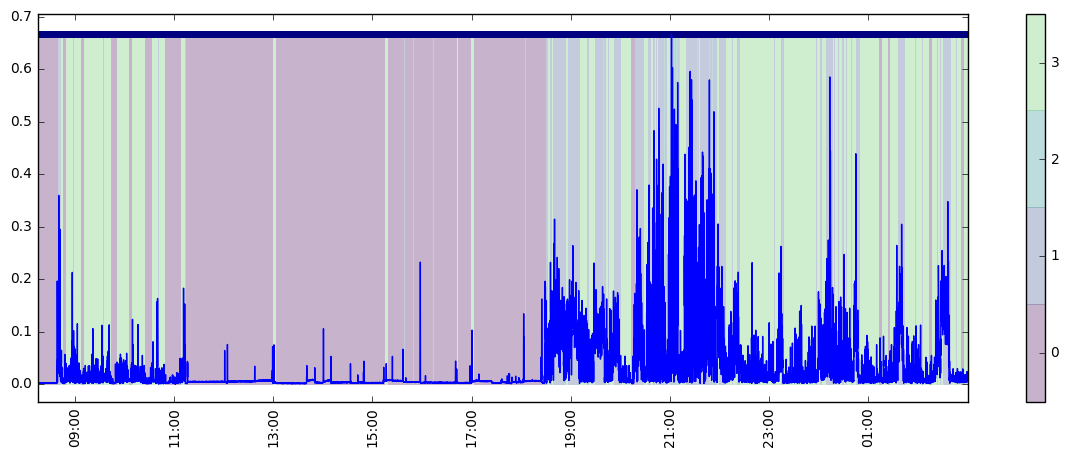

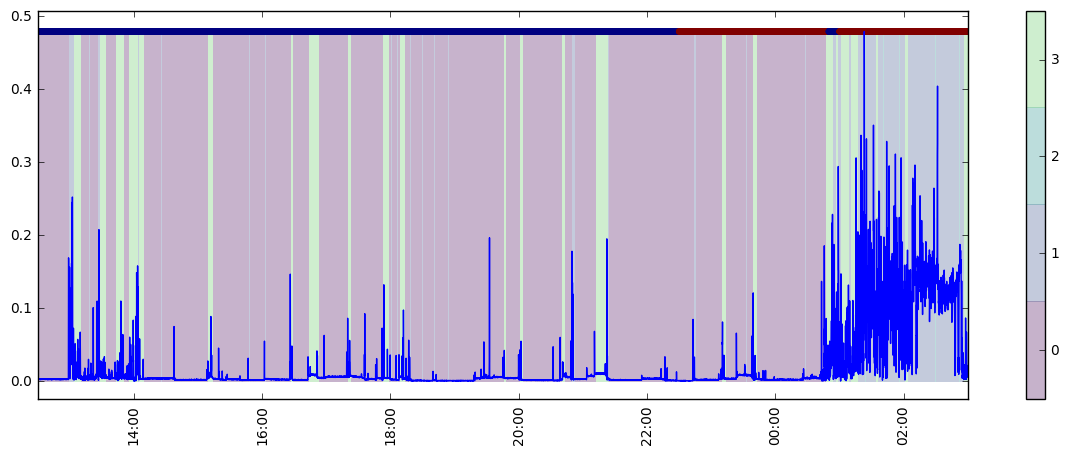

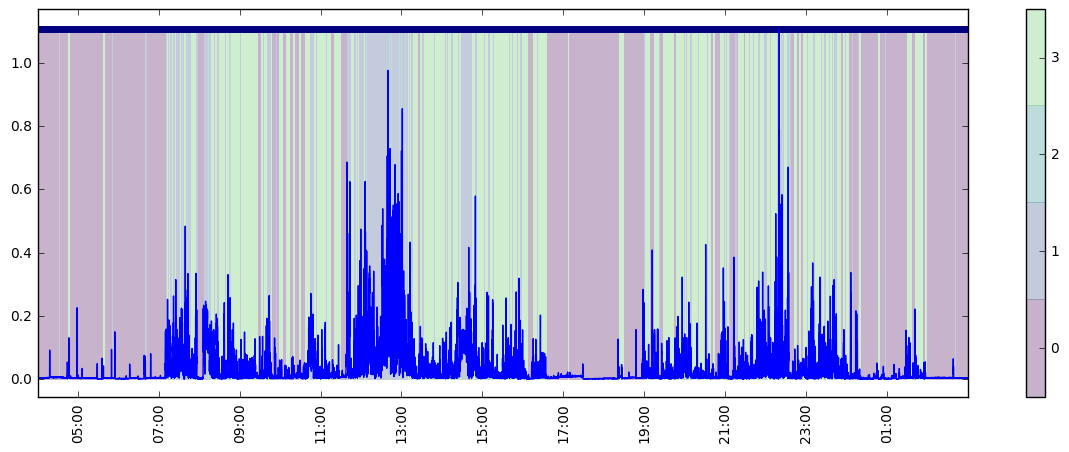

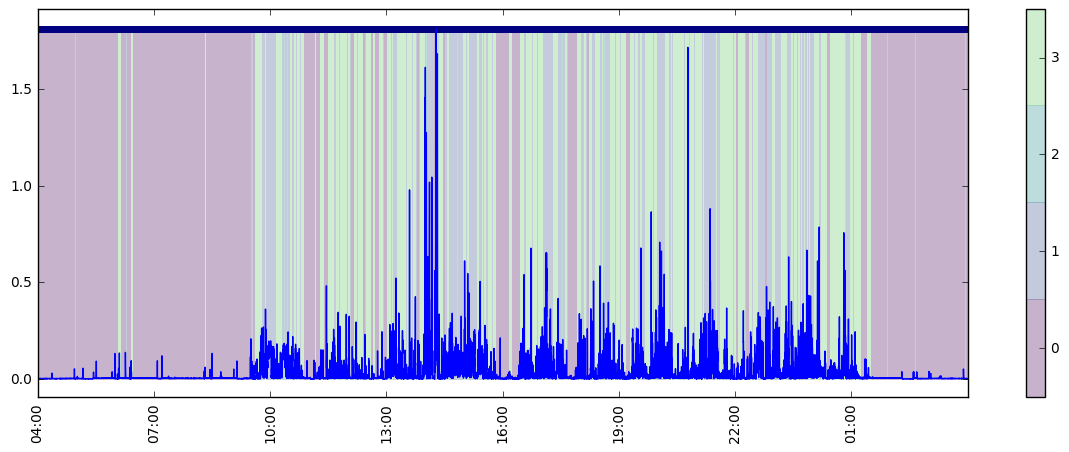

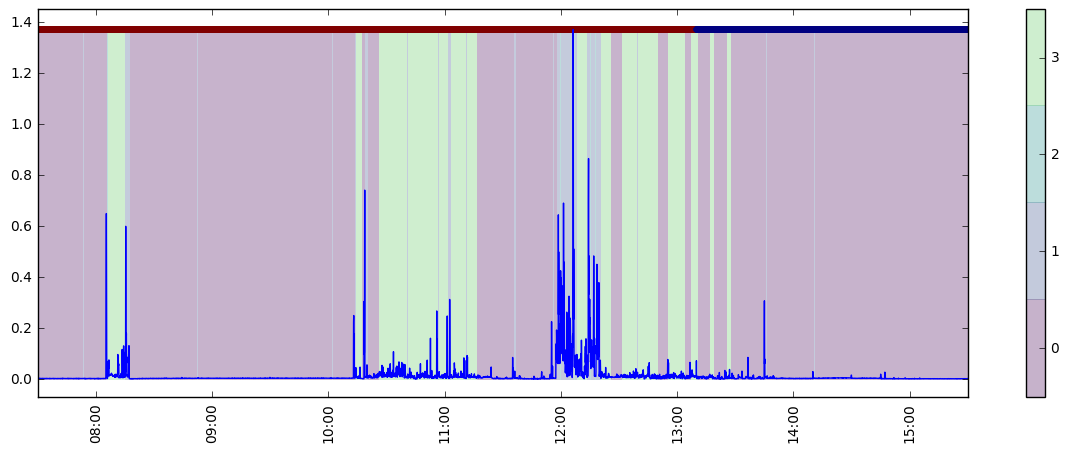

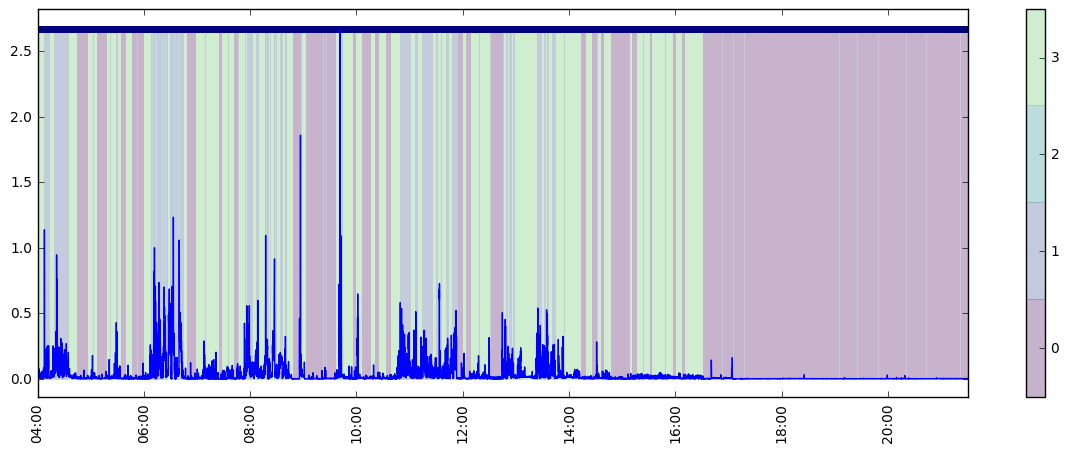

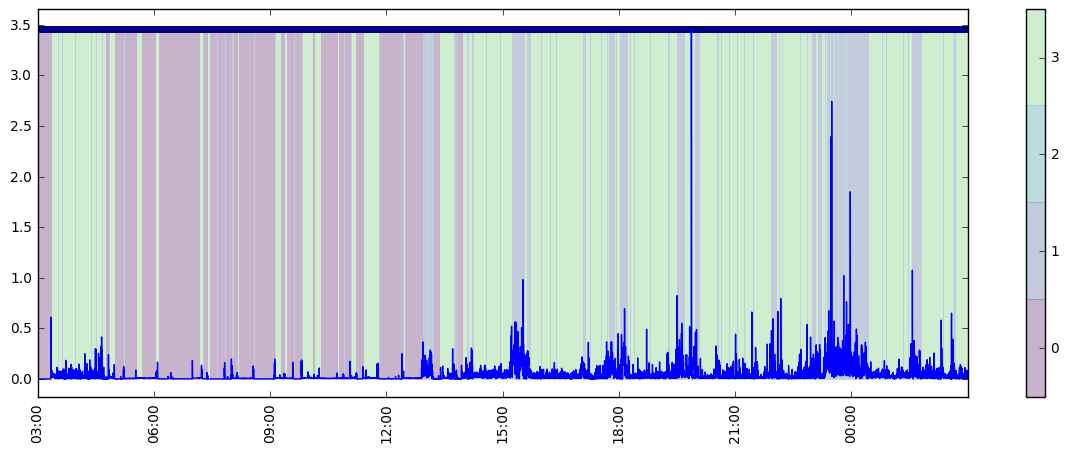

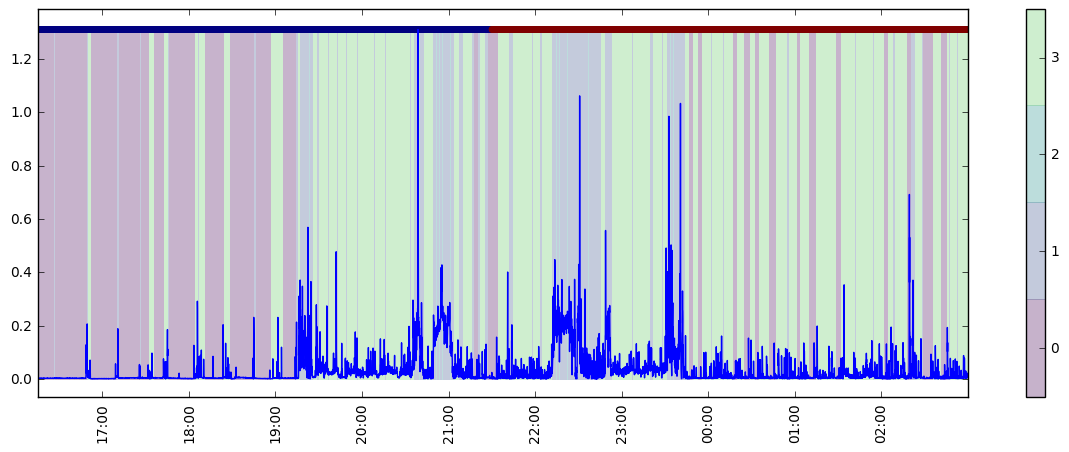

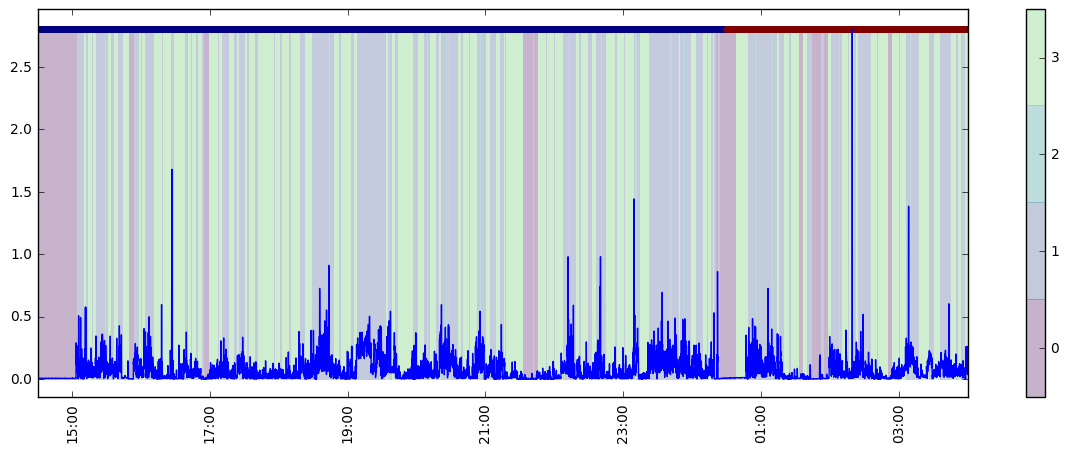

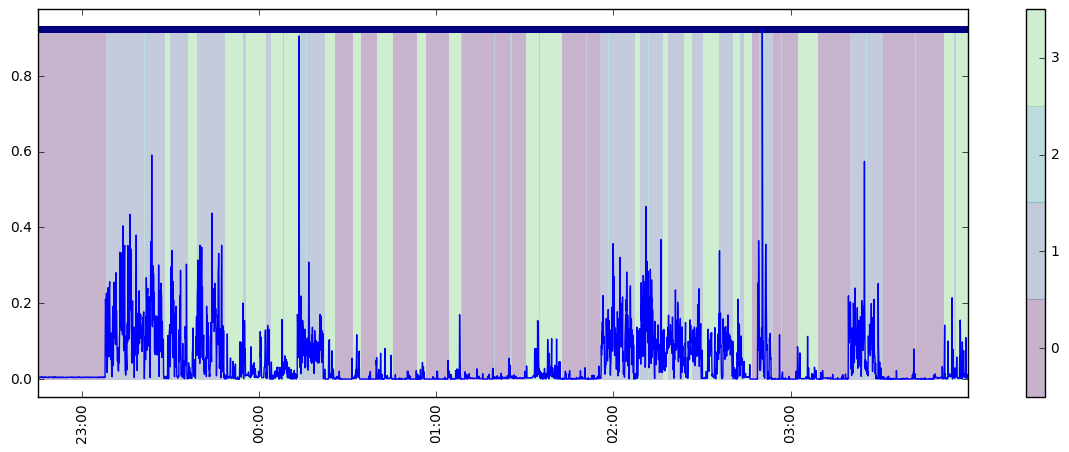

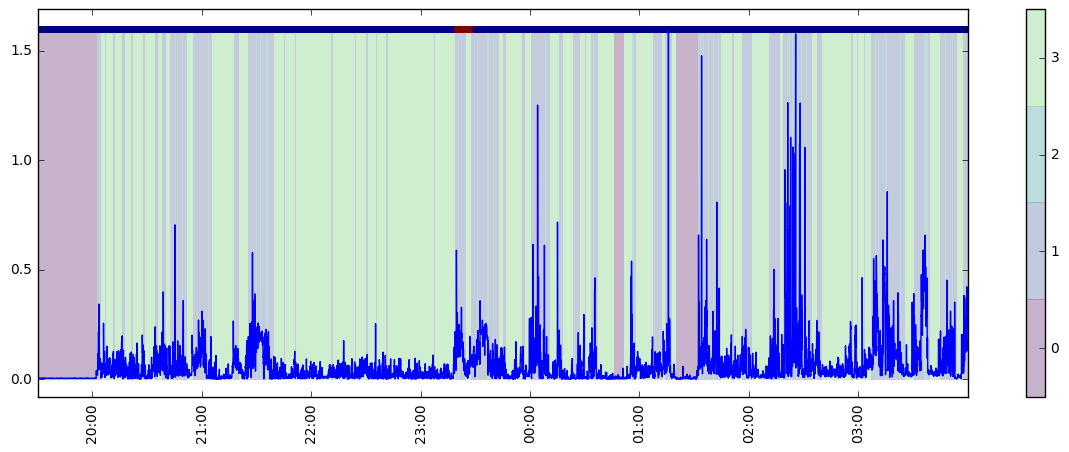

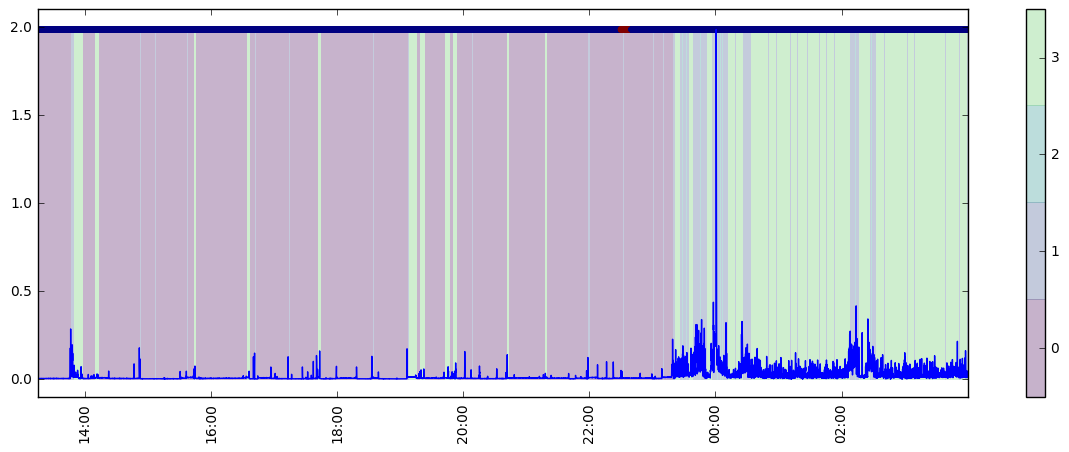

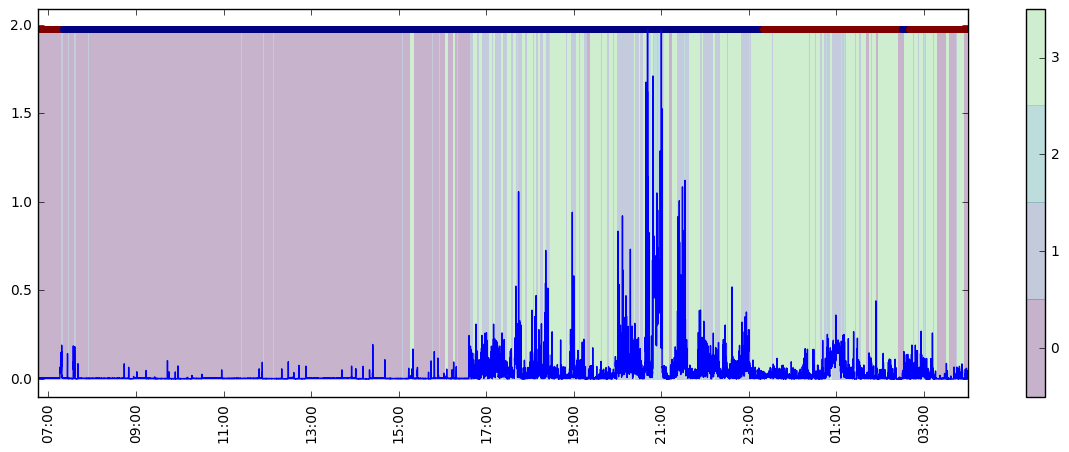

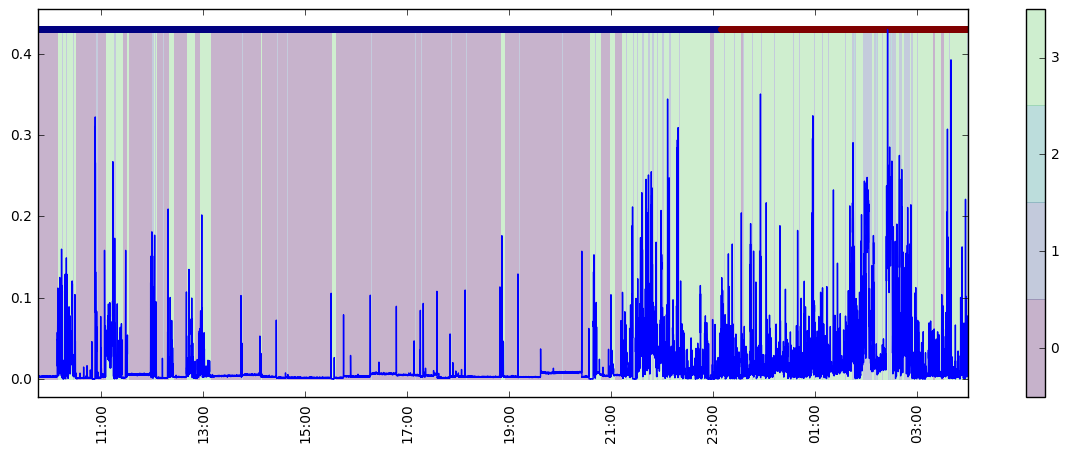

In [10]:
nr_datasets = len(datasets)

for i in range(nr_datasets):
    dat = datasets[i]
    dat['sleep'] = [1*(d==1) for d in dat['act']]
    hsmm.plot_states_and_var_new(dat, dat['state'], columns=['acceleration',], by='sleep', cmap=cmap_states)
plt.show()